# Importando bibliotecas

In [1]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

# CUIDADO!!! Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

In [2]:
# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

In [3]:
sns.set_theme()

# Lendo dados

In [4]:
dadosdf = m.carrega_pickles()

Lendo porquinho_mra34.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra33.pickle			


In [5]:
dadosdf.iloc[10] # Caso com erro de coleta (mra32C)... retirando

Animal                                                         mra32
Manobra                                                            C
Dados              [[10.299739837646484, -71.4944076538086], [20....
n_steps                                                            4
Pressoes           [10.299739837646484, 15.213281631469727, 20.33...
Volumes            [-71.4944076538086, 46.17720031738281, 192.731...
volume_esperado                                                    0
Name: 10, dtype: object

In [6]:
dadosdf.drop(10,inplace=True)

In [7]:
dadosdf

Animal Manobra                                              Dados n_steps  \
0   mra34       C  [[9.928905963897705, -259.58831787109375], [20...       4   
1   mra34       D  [[9.9609375, -167.6243133544922], [20.25208377...       5   
2   mra34       B  [[10.135156631469727, -149.72845458984375], [2...       3   
3   mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4   mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   
5   mra28       D  [[10.240625381469727, -179.3195037841797], [20...       5   
6   mra31       D  [[10.0, -107.7169418334961], [20.2000007629394...       5   
7   mra31       B  [[10.300000190734863, -25.01786231994629], [20...       3   
8   mra31       C  [[9.699999809265137, -228.3211212158203], [20....       4   
9   mra32       D  [[10.625260829925537, -53.54884338378906], [20...       5   
11  mra32       B  [[10.62864637374878, -25.914222717285156], [20...       3   
12  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
13  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
14  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
15  mra29       D  [[10.286250114440918, -210.43722534179688], [2...       5   
16  mra29       B  [[10.26111125946045, -307.4459228515625], [20....       3   
17  mra29       C  [[10.105555534362793, -265.270263671875], [20....       4   
18  mra33       D  [[10.312239646911621, -75.62246704101562], [20...       5   
19  mra33       B  [[10.303646087646484, 146.587890625], [20.1421...       3   
20  mra33       C  [[10.202864646911621, -56.06181335449219], [20...       4   

                                             Pressoes  \
0   [9.928905963897705, 14.968489646911621, 20.058...   
1   [9.9609375, 15.040364742279053, 20.13463592529...   
2   [10.135156631469727, 15.052343845367432, 20.00...   
3   [10.287500381469727, 14.931250095367432, 20.21...   
4   [10.021874904632568, 14.962499618530273, 20.01...   
5   [10.240625381469727, 14.828125, 20.05937480926...   
6   [10.0, 15.0, 20.100000381469727, 24.8999996185...   
7   [10.300000190734863, 15.100000381469727, 19.89...   
8   [9.699999809265137, 15.300000190734863, 20.100...   
9   [10.625260829925537, 15.398958206176758, 20.37...   
11  [10.62864637374878, 15.36510419845581, 20.3697...   
12                [10.25, 15.334375381469727, 20.375]   
13  [10.178125381469727, 15.212499618530273, 20.42...   
14  [10.131250381469727, 15.112500190734863, 20.27...   
15  [10.286250114440918, 15.094120502471924, 19.99...   
16  [10.26111125946045, 15.117916584014893, 20.029...   
17  [10.105555534362793, 15.18842601776123, 20.045...   
18  [10.312239646911621, 14.991406440734863, 20.00...   
19  [10.303646087646484, 14.871094226837158, 20.07...   
20  [10.202864646911621, 15.145573139190674, 20.05...   

                                              Volumes  volume_esperado  
0   [-259.58831787109375, -81.21270751953125, 147....                0  
1   [-167.6243133544922, 13.06080150604248, 203.19...                0  
2   [-149.72845458984375, 36.645347595214844, 243....                0  
3   [-152.2864532470703, -45.45492172241211, 234.1...                0  
4   [-128.87612915039062, -2.0903725624084473, 208...                0  
5   [-179.3195037841797, -62.187042236328125, 182....                0  
6   [-107.7169418334961, 47.35507583618164, 235.19...                0  
7   [-25.01786231994629, 122.25248718261719, 244.6...                0  
8   [-228.3211212158203, -71.18547058105469, 125.5...                0  
9   [-53.54884338378906, 33.332923889160156, 174.5...                0  
11  [-25.914222717285156, 74.27739715576172, 206.2...                0  
12  [-145.76797485351562, -37.26432800292969, 166....                0  
13  [-197.8517303466797, -95.13343811035156, 97.13...                0  
14  [-147.3227081298828, -36.04450607299805, 131.8...                0  
15  [-210.43722534179688, -11

## Incluindo volume esperado no dataframe

Volumes esperados:

* MRA26: 2622.9 mL; K = 0.0309
* MRA28: 2105.9 mL; K = 0.0447
* MRA29: 2205.7 mL; K = 0.0596
* MRA31: 1974.4 mL; K = 0.0619
* MRA32: 1440.2 mL; K = 0.0476
* MRA33: 2154.6 mL; K = 0.0634
* MRA34: 2211.2 mL; K = 0.0544

In [8]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2211.2
}

In [9]:
dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)

In [10]:
dadosdf

Animal Manobra                                              Dados n_steps  \
0   mra34       C  [[9.928905963897705, -259.58831787109375], [20...       4   
1   mra34       D  [[9.9609375, -167.6243133544922], [20.25208377...       5   
2   mra34       B  [[10.135156631469727, -149.72845458984375], [2...       3   
3   mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4   mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   
5   mra28       D  [[10.240625381469727, -179.3195037841797], [20...       5   
6   mra31       D  [[10.0, -107.7169418334961], [20.2000007629394...       5   
7   mra31       B  [[10.300000190734863, -25.01786231994629], [20...       3   
8   mra31       C  [[9.699999809265137, -228.3211212158203], [20....       4   
9   mra32       D  [[10.625260829925537, -53.54884338378906], [20...       5   
11  mra32       B  [[10.62864637374878, -25.914222717285156], [20...       3   
12  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
13  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
14  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
15  mra29       D  [[10.286250114440918, -210.43722534179688], [2...       5   
16  mra29       B  [[10.26111125946045, -307.4459228515625], [20....       3   
17  mra29       C  [[10.105555534362793, -265.270263671875], [20....       4   
18  mra33       D  [[10.312239646911621, -75.62246704101562], [20...       5   
19  mra33       B  [[10.303646087646484, 146.587890625], [20.1421...       3   
20  mra33       C  [[10.202864646911621, -56.06181335449219], [20...       4   

                                             Pressoes  \
0   [9.928905963897705, 14.968489646911621, 20.058...   
1   [9.9609375, 15.040364742279053, 20.13463592529...   
2   [10.135156631469727, 15.052343845367432, 20.00...   
3   [10.287500381469727, 14.931250095367432, 20.21...   
4   [10.021874904632568, 14.962499618530273, 20.01...   
5   [10.240625381469727, 14.828125, 20.05937480926...   
6   [10.0, 15.0, 20.100000381469727, 24.8999996185...   
7   [10.300000190734863, 15.100000381469727, 19.89...   
8   [9.699999809265137, 15.300000190734863, 20.100...   
9   [10.625260829925537, 15.398958206176758, 20.37...   
11  [10.62864637374878, 15.36510419845581, 20.3697...   
12                [10.25, 15.334375381469727, 20.375]   
13  [10.178125381469727, 15.212499618530273, 20.42...   
14  [10.131250381469727, 15.112500190734863, 20.27...   
15  [10.286250114440918, 15.094120502471924, 19.99...   
16  [10.26111125946045, 15.117916584014893, 20.029...   
17  [10.105555534362793, 15.18842601776123, 20.045...   
18  [10.312239646911621, 14.991406440734863, 20.00...   
19  [10.303646087646484, 14.871094226837158, 20.07...   
20  [10.202864646911621, 15.145573139190674, 20.05...   

                                              Volumes  volume_esperado  
0   [-259.58831787109375, -81.21270751953125, 147....           2211.2  
1   [-167.6243133544922, 13.06080150604248, 203.19...           2211.2  
2   [-149.72845458984375, 36.645347595214844, 243....           2211.2  
3   [-152.2864532470703, -45.45492172241211, 234.1...           2105.9  
4   [-128.87612915039062, -2.0903725624084473, 208...           2105.9  
5   [-179.3195037841797, -62.187042236328125, 182....           2105.9  
6   [-107.7169418334961, 47.35507583618164, 235.19...           1974.4  
7   [-25.01786231994629, 122.25248718261719, 244.6...           1974.4  
8   [-228.3211212158203, -71.18547058105469, 125.5...           1974.4  
9   [-53.54884338378906, 33.332923889160156, 174.5...           1440.2  
11  [-25.914222717285156, 74.27739715576172, 206.2...           1440.2  
12  [-145.76797485351562, -37.26432800292969, 166....           2622.9  
13  [-197.8517303466797, -95.13343811035156, 97.13...           2622.9  
14  [-147.3227081298828, -36.04450607299805, 131.8...           2622.9  
15  [-210.43722534179688, -11

# Testando modelos

## Dados dos modelos

In [11]:
modelos = []

Vmin =  500 # mL
Vmax = 3500 # mL

# sigmoid_recruit_units:
#                 K, Vmax, mi, sigma, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoid_recruit_units
mod.TLC_index = 1
mod.p0 =      [0.05, 2000, 27,    12,   -200]
mod.p2 =      [0.08, 2000, 27,    12,   -200]
mod.bounds = ([0.03, Vmin, 10,     6,   -500],
              [0.07, Vmax, 40,    35,    200])
##############     ,     ,  X,     X,      X.
modelos.append(mod)


# sigmoidvenegas1: (a, b, c, d):  V = a + b/(1 + np.exp(-(x-c)/d))
#              offset, Vmax, 'mi', 'sigma'   
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas1
mod.TLC_index = 1
mod.p0 =      [  -200, 2000,   32,      8]
mod.p2 =      [  -200, 2000,   32,      8]
mod.bounds = ([  -500, Vmin,   20,      5],
              [   200, Vmax,   40,     18])
##############      X,     ,    X,      X.
modelos.append(mod)


# sigmoidpaivaoffset: (TLC,k1,k2,offset):  V = TLC/(1+(k1*TCL*np.exp(-k2*x))) + offset 
#            Vmax,      k1,   k2, offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidpaivaoffset
mod.TLC_index = 0
mod.p0 =      [  2000,   0.03, 0.13,   -200]
mod.p2 =      [  2000,   0.03, 0.13,   -200]
mod.bounds = ([  Vmin,  0.008, 0.08,   -500],
              [  Vmax,   0.15, 0.25,    200])
##############       ,      X,    X,      X.
modelos.append(mod)


# sigmoidvenegas2offset: TLC,B,k,c,d: V = (TLC-(B*np.exp(-k*x)))/(1 + np.exp(-(x-c)/d)) + offset
#                Vmax,     B,       k,       c,       d,  offset
mod = m.dados_modelos()
mod.model_function = m.sigmoidvenegas2offset
mod.TLC_index = 0
mod.p0 =      [  2000,    2000,    0.05,      28,       7,    -200]
mod.p2 =      [  2000,       1,       1,      32,       7,    -200]
mod.bounds = ([  Vmin,       0,       0,      15,       4,    -500],
              [  Vmax,    Vmax,       1,      40,      15,     200])
##############       ,       X,       X,       X,       X,       X .
modelos.append(mod)


# sigmoidmurphy: VM,Vm,k1,k2,k3: P = ( k1/(VM-x) ) + ( k2/(Vm-x) ) + k3
#                   VM,      Vm,      k1,      k2,      k3
mod = m.dados_modelos()
mod.model_function = m.sigmoidmurphy
mod.TLC_index = 0
mod.p0 =      [ 1800.0,  -200.0,    6000,    6000,    32.0]
mod.p2 =      [ 1800.0,  -200.0,    6000,    6000,    32.0]
mod.bounds = ([    500,    -600,    2000,    2000,     10],
              [   3500,    -100,   20000,   20000,     40])
##############        ,       X,       X,       X,       X.
mod.invert_PV = True
modelos.append(mod)


# sigmoidmurphyoffset: TLC,offset,k1,k2,k3: P = ( k1/((TLC-offset)-x) ) + ( k2/(offset-x) ) + k3
#                   VM,      Vm,      k1,      k2,      k3
mod = m.dados_modelos()
mod.model_function = m.sigmoidmurphyoffset
mod.TLC_index = 0
mod.p0 =      [ 2000.0,  -200.0,    6000,    6000,    32.0]
mod.p2 =      [ 2000.0,  -200.0,    6000,    6000,    32.0]
mod.bounds = ([   Vmin,    -600,    2000,    2000,     10],
              [   Vmax,    -100,   20000,   20000,     40])
##############        ,       X,       X,       X,       X.
mod.invert_PV = True
modelos.append(mod)


## Entendendo o p0

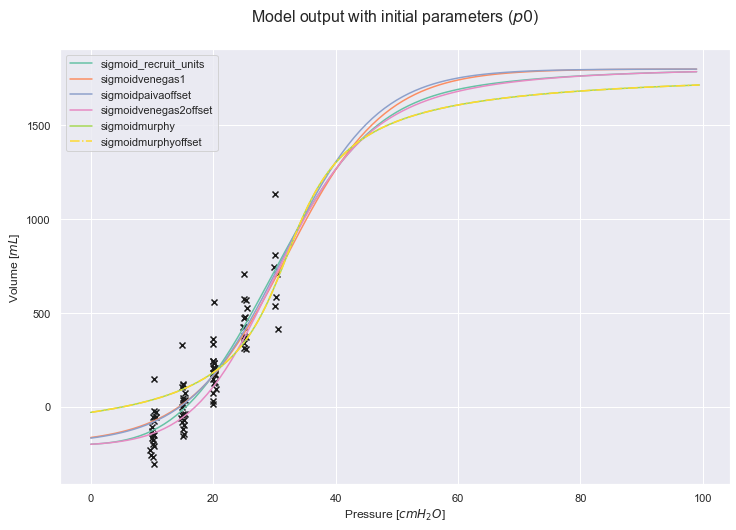

In [12]:
style_lst = ['-','-','-','-','-','-.']
with sns.color_palette("Set2", n_colors=len(modelos)):
    plt.figure(figsize=(12,8))
    for idx,mod in enumerate(modelos):
        #plt.subplot(1,5,idx+1)
        if mod.invert_PV:
            v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
            meu_v = np.asarray(range(v_min,v_max))
            meu_p = mod.model_function(meu_v,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])
        else:
            meu_p = np.asarray(range(0,100))
            meu_v = mod.model_function(meu_p,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])

        #plt.title(mod.model_function.__name__)
        plt.ylabel('Volume [$mL$]')
        plt.xlabel('Pressure [$cmH_2O$]')
        plt.title('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)
        plt.legend()
with sns.color_palette("bright", n_colors=21):
    for idx in range(len(dadosdf)):
        plt.scatter(dadosdf.iloc[idx]['Pressoes'],dadosdf.iloc[idx]['Volumes'],marker='x',c='k')

In [13]:
style_lst = ['-','-','-','-','-','-.']
with sns.color_palette("Set2", n_colors=len(modelos)):    
    plt.figure(figsize=(12,8))
    for idx,mod in enumerate(modelos):
        #plt.subplot(1,5,idx+1)
        if mod.invert_PV:
            v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
            meu_v = np.asarray(range(v_min,v_max))
            meu_p = mod.model_function(meu_v,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])
        else:
            meu_p = np.asarray(range(0,100))
            meu_v = mod.model_function(meu_p,*(mod.p0))
            plt.plot(meu_p,meu_v,label=mod.model_function.__name__,linestyle=style_lst[idx])

        #plt.title(mod.model_function.__name__)
        plt.ylabel('Volume [$mL$]')
        plt.xlabel('Pressure [$cmH_2O$]')
        plt.title('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)
        plt.legend()

In [14]:
plt.figure(figsize=(30,5))
for idx,mod in enumerate(modelos):
    plt.subplot(1,len(modelos),idx+1)
    if mod.invert_PV:
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p0))
        plt.plot(meu_p,meu_v)
    else:
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p0))
        plt.plot(meu_p,meu_v)

    plt.ylabel('Volume [$mL$]')
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.title(mod.model_function.__name__)
    plt.suptitle('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)

## Entendendo os bounds

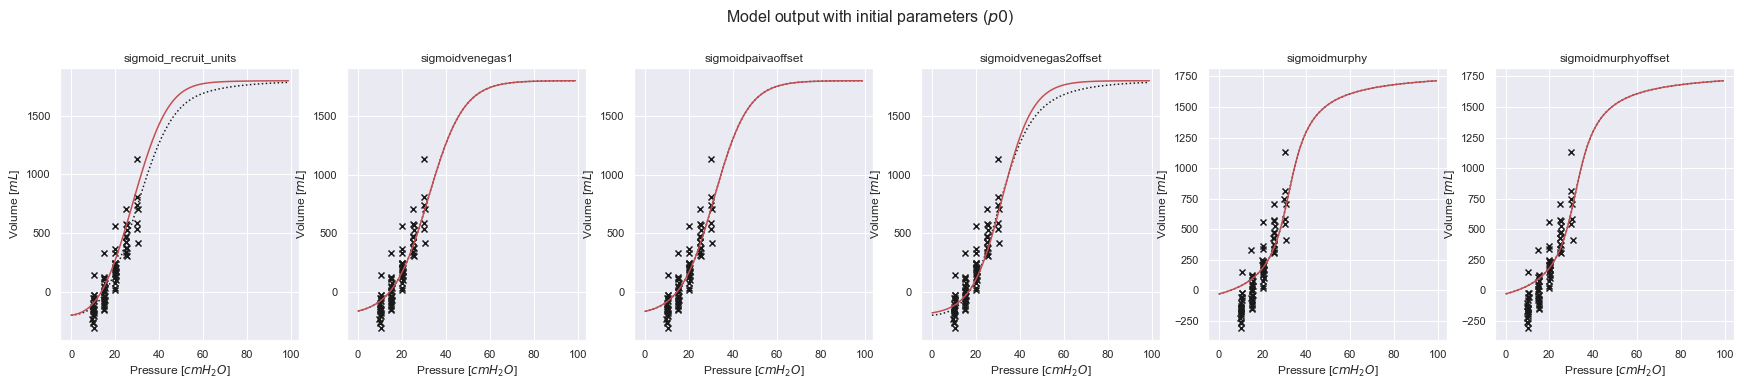

In [15]:
# comparando p0 com p2:
plt.figure(figsize=(30,5))
for idx,mod in enumerate(modelos):
    plt.subplot(1,len(modelos),idx+1)
    if mod.invert_PV:
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p0,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p0))
        plt.plot(meu_p,meu_v,'k:')
        v_min,v_max = m.encontra_volumes_limites_Murphy(mod.p2,modelo=mod.model_function)
        meu_v = np.asarray(range(v_min,v_max))
        meu_p = mod.model_function(meu_v,*(mod.p2))
        plt.plot(meu_p,meu_v,'r-')
    else:
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p0))
        plt.plot(meu_p,meu_v,'k:')
        meu_p = np.asarray(range(0,100))
        meu_v = mod.model_function(meu_p,*(mod.p2))
        plt.plot(meu_p,meu_v,'r-')

    for idx in range(len(dadosdf)):
        plt.scatter(dadosdf.iloc[idx]['Pressoes'],dadosdf.iloc[idx]['Volumes'],marker='x',c='k')

    plt.ylabel('Volume [$mL$]')
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.title(mod.model_function.__name__)
    plt.suptitle('Model output with initial parameters ($p0$)', fontsize=16, y=1.05)

## Extraindo informações

In [16]:
resultdf_indiv = m.testa_varios_indiv(dadosdf, modelos)

Rodando sigmoid_recruit_units
Rodando sigmoidvenegas1
Rodando sigmoidpaivaoffset
Rodando sigmoidvenegas2offset
Rodando sigmoidmurphy
Rodando sigmoidmurphyoffset


In [17]:
resultdf_indiv.to_pickle('./output/dados_eit_modelos.pkl')

In [18]:
resultdf_indiv

Animal Maneuver n_steps  \
0     mra34        C       4   
1     mra34        D       5   
2     mra34        B       3   
3     mra28        C       4   
4     mra28        B       3   
...     ...      ...     ...   
1795  mra29        B       3   
1796  mra29        C       4   
1797  mra33        D       5   
1798  mra33        B       3   
1799  mra33        C       4   

                                              Pressures  \
0     [9.928905963897705, 14.968489646911621, 20.058...   
1     [9.9609375, 15.040364742279053, 20.13463592529...   
2     [10.135156631469727, 15.052343845367432, 20.00...   
3     [10.287500381469727, 14.931250095367432, 20.21...   
4     [10.021874904632568, 14.962499618530273, 20.01...   
...                                                 ...   
1795  [10.26111125946045, 15.117916584014893, 20.029...   
1796  [10.105555534362793, 15.18842601776123, 20.045...   
1797  [10.312239646911621, 14.991406440734863, 20.00...   
1798  [10.303646087646484, 14.871094226837158, 20.07...   
1799  [10.202864646911621, 15.145573139190674, 20.05...   

                                                Volumes  \
0     [-259.58831787109375, -81.21270751953125, 147....   
1     [-167.6243133544922, 13.06080150604248, 203.19...   
2     [-149.72845458984375, 36.645347595214844, 243....   
3     [-152.2864532470703, -45.45492172241211, 234.1...   
4     [-128.87612915039062, -2.0903725624084473, 208...   
...                                                 ...   
1795  [-307.4459228515625, -156.31631469726562, 16.6...   
1796  [-265.270263671875, -145.95188903808594, 74.12...   
1797  [-75.62246704101562, 107.81485748291016, 363.4...   
1798  [146.587890625, 330.3841552734375, 560.5339355...   
1799  [-56.06181335449219, 113.50151824951172, 334.8...   

                      Model  Method TLC_index N_points_interp  \
0     sigmoid_recruit_units      lm         1               0   
1     sigmoid_recruit_units      lm         1               0   
2     sigmoid_recruit_units      lm         1               0   
3     sigmoid_recruit_units      lm         1               0   
4     sigmoid_recruit_units      lm         1               0   
...                     ...     ...       ...             ...   
1795    sigmoidmurphyoffset  dogbox         0              20   
1796    sigmoidmurphyoffset  dogbox         0              20   
1797    sigmoidmurphyoffset  dogbox         0              20   
1798    sigmoidmurphyoffset  dogbox         0              20   
1799    sigmoidmurphyoffset  dogbox         0              20   

                                      p0  \
0             [0.05, 2000, 27, 12, -200]   
1             [0.05, 2000, 27, 12, -200]   
2             [0.05, 2000, 27, 12, -200]   
3             [0.05, 2000, 27, 12, -200]   
4             [0.05, 2000, 27, 12, -200]   
...                                  ...   
1795  [2000.0, -200.0, 6000, 6000, 32.0]   
1796  [2000.0, -200.0, 6000, 6000, 32.0]   
1797  [2000.0, -200.0, 6000, 6000, 32.0]   
1798  [2000.0, -200.0, 6000, 6000, 32.0]   
1799  [2000.0, -200.0, 6000, 6000, 32.0]   

                                                 bounds fitted  \
0                                                    []  False   
1                                                    []  False   
2                                                    []  False   
3                                                    []  False   
4                                                    []  False   
...                                                 ...    ...   
1795  ([500, -600, 2000, 2000, 10], [3500, -100, 200...  False   
1796  ([500, -600, 2000, 2000, 10], [3500, -100, 200...  False   
1797  ([500, -600, 2000, 2000, 10], [3500, -100, 200...   True   
1798  ([500, -600, 2000, 2000, 10], [3500, -100, 200...   True   
1799  ([500, -600, 2000, 2000, 10], [3500, -100, 200...   True   

                                             parameters  Vol_CT      error  \
0                    

## Subsets

In [19]:
resultdf_indiv_fitted = resultdf_indiv[resultdf_indiv['fitted']==True]
resultdf_indiv_fitted_lm = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='lm']
resultdf_indiv_fitted_trf = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='trf']
resultdf_indiv_fitted_dogbox = resultdf_indiv_fitted[resultdf_indiv_fitted['Method']=='dogbox']

## Dados numéricos

In [20]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','n_steps']].groupby('fitted').describe()

Model                                    n_steps                
       count unique                    top freq   count unique top freq
fitted                                                                 
False    624      6  sigmoidvenegas2offset  159     624      3   3  246
True    1176      6     sigmoidpaivaoffset  265    1176      3   5  470

In [21]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','N_points_interp','Method','n_steps']].groupby(['Model','Method','fitted']).count()

N_points_interp  n_steps
Model                 Method fitted                          
sigmoid_recruit_units dogbox False                 4        4
                             True                 96       96
                      lm     False                75       75
                             True                 25       25
                      trf    True                100      100
sigmoidmurphy         dogbox False                48       48
                             True                 52       52
                      lm     False                79       79
                             True                 21       21
                      trf    False                29       29
                             True                 71       71
sigmoidmurphyoffset   dogbox False                43       43
                             True                 57       57
                      lm     False                79       79
                             True                 21       21
                      trf    False                29       29
                             True                 71       71
sigmoidpaivaoffset    dogbox False                 1        1
                             True                 99       99
                      lm     False                34       34
                             True                 66       66
                      trf    True                100      100
sigmoidvenegas1       dogbox False                10       10
                             True                 90       90
                      lm     False                34       34
                             True                 66       66
                      trf    True                100      100
sigmoidvenegas2offset dogbox False                35       35
                             True                 65       65
                      lm     False                92       92
                             True                  8        8
                      trf    False                32       32
                             True                 68       68

In [22]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted','n_steps']].groupby(['Model','fitted']).count()

n_steps
Model                 fitted         
sigmoid_recruit_units False        79
                      True        221
sigmoidmurphy         False       156
                      True        144
sigmoidmurphyoffset   False       151
                      True        149
sigmoidpaivaoffset    False        35
                      True        265
sigmoidvenegas1       False        44
                      True        256
sigmoidvenegas2offset False       159
                      True        141

In [23]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','fitted']][resultdf_indiv['fitted']==True].groupby('Model').count()

fitted
Model                        
sigmoid_recruit_units     221
sigmoidmurphy             144
sigmoidmurphyoffset       149
sigmoidpaivaoffset        265
sigmoidvenegas1           256
sigmoidvenegas2offset     141

In [24]:
# Verificando quantos casos fitaram, por modelo
resultdf_indiv[['Model','error']][resultdf_indiv['fitted']==True].groupby('Model').mean()

error
Model                           
sigmoid_recruit_units   0.916151
sigmoidmurphy           1.528206
sigmoidmurphyoffset     0.356568
sigmoidpaivaoffset    -23.366040
sigmoidvenegas1       -20.590727
sigmoidvenegas2offset   2.086893

## Gráficos

### Quantos dados fitaram

In [25]:
ax = sns.countplot(x="Model", hue="fitted", palette="pastel",
                   data=resultdf_indiv)
for item in ax.get_xticklabels():
    item.set_rotation(75)
plt.title('Number of sets fitted by model')

Text(0.5, 1.0, 'Number of sets fitted by model')

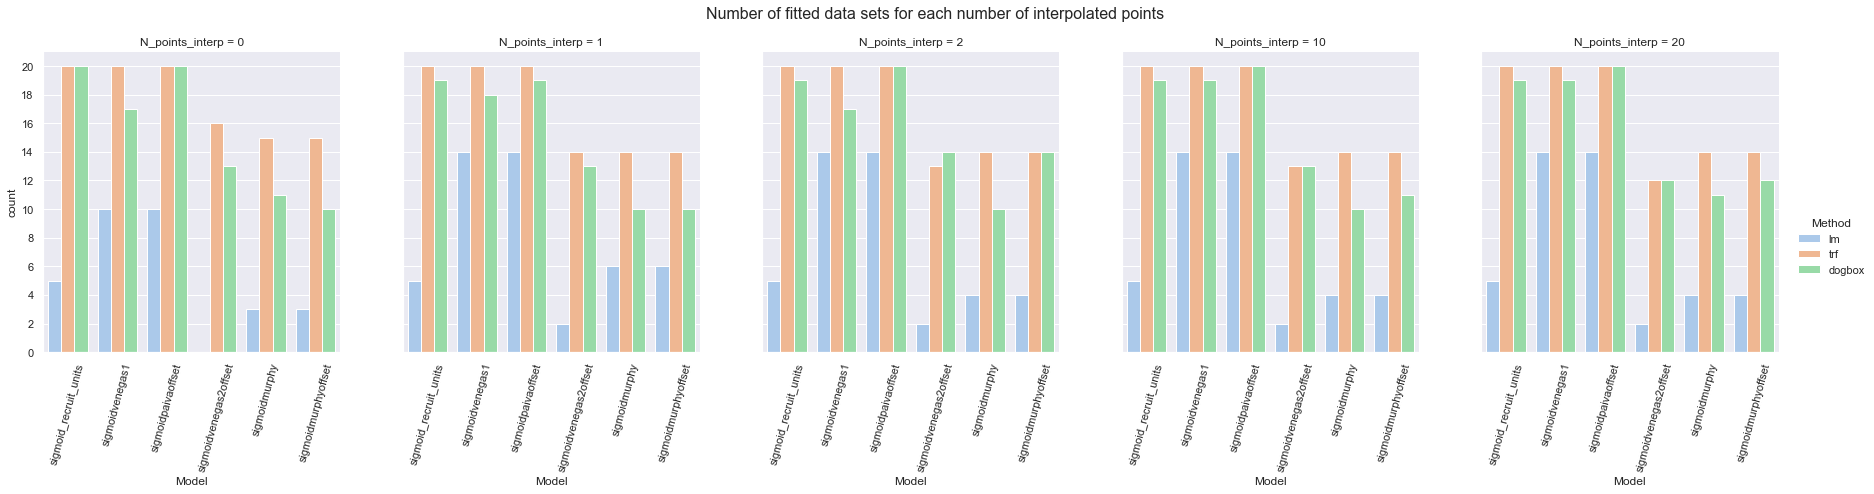

In [26]:
ax2 = sns.catplot(x="Model", kind="count", hue='Method',
            palette="pastel", col="N_points_interp",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=75)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Number of fitted data sets for each number of interpolated points', fontsize=16, y=1.05)
plt.show()

In [46]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="Method",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=75)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Number of fitted data sets, by method', fontsize=16, y=1.05)
plt.show()
# somando as 3 manobras

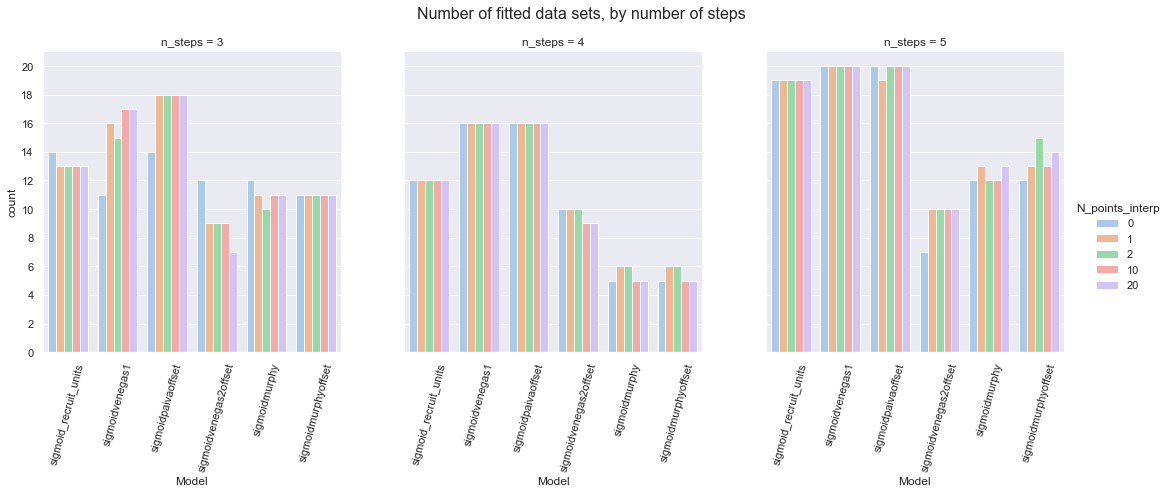

In [28]:
ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
            palette="pastel", col="n_steps",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=75)
plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Number of fitted data sets, by number of steps', fontsize=16, y=1.05)
plt.show()
# somando os 3 métodos

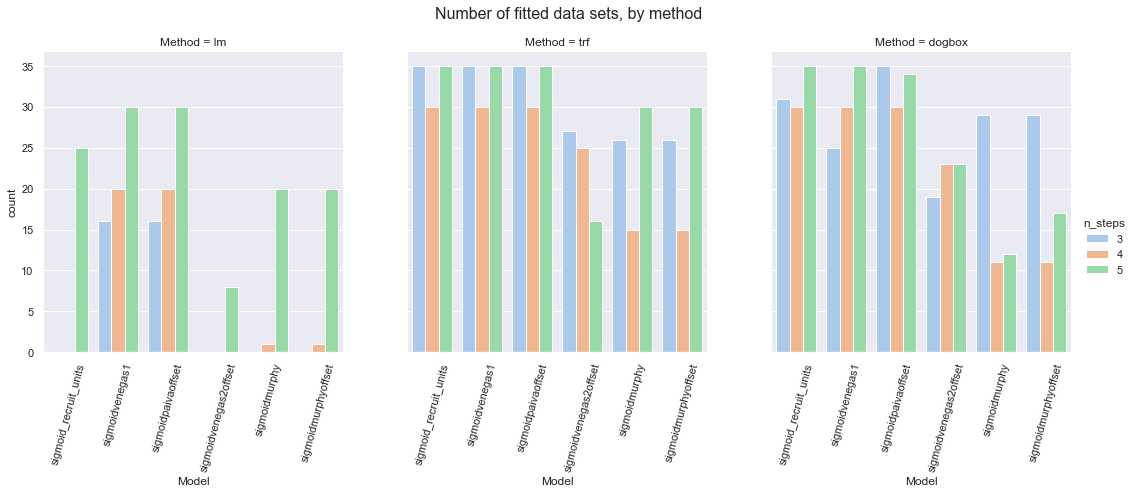

In [53]:
ax2 = sns.catplot(x="Model", kind="count", hue='n_steps',
            palette="pastel", col="Method",
            data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=75)
#plt.yticks(np.arange(0, 22, step=2))
plt.suptitle('Number of fitted data sets, by method', fontsize=16, y=1.05)
plt.show()
# somando os 3 métodos

In [29]:
#plt.figure(figsize=(6,4))
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", kind="count", hue='N_points_interp',
                palette="pastel", col="n_steps",
                data=df)
    ax2.set_xticklabels(rotation=75)
    plt.suptitle('Number of fitted data sets, by number of steps (Method = \''+met+'\')', fontsize=16, y=1.1)
    #print(plt.gcf().get_size_inches())
    plt.gcf().set_size_inches(20,3)
    plt.show()

### Gráficos dos modelos ajustados

In [30]:
resultdf_indiv_fitted.head(3)

Animal Maneuver n_steps                                          Pressures  \
6   mra31        D       5  [10.0, 15.0, 20.100000381469727, 24.8999996185...   
9   mra32        D       5  [10.625260829925537, 15.398958206176758, 20.37...   
12  mra26        D       5  [10.178125381469727, 15.212499618530273, 20.42...   

                                              Volumes                  Model  \
6   [-107.7169418334961, 47.35507583618164, 235.19...  sigmoid_recruit_units   
9   [-53.54884338378906, 33.332923889160156, 174.5...  sigmoid_recruit_units   
12  [-197.8517303466797, -95.13343811035156, 97.13...  sigmoid_recruit_units   

   Method TLC_index N_points_interp                          p0 bounds fitted  \
6      lm         1               0  [0.05, 2000, 27, 12, -200]     []   True   
9      lm         1               0  [0.05, 2000, 27, 12, -200]     []   True   
12     lm         1               0  [0.05, 2000, 27, 12, -200]     []   True   

                                           parameters  Vol_CT      error  \
6   [0.34285106212509886, 1017.4687169097865, 20.2...  1974.4 -48.466941   
9   [0.01381447806335124, 1478.827005075959, 16.36...  1440.2   2.682058   
12  [0.36174633075215756, 1748.1704367999664, 29.0...  2622.9 -33.349711   

   fit error error factor                                           Raw data  
6   5.646216     2.525065  [[10.0, -107.7169418334961], [20.2000007629394...  
9   0.321625     0.143835  [[10.625260829925537, -53.54884338378906], [20...  
12  2.252712     1.007444  [[10.178125381469727, -197.8517303466797], [20...

In [31]:
def plot_fitted_model(df, modelo = m.sigmoid_recruit_units, metodo = 'trf', nsteps = 5, ninterp = 0, pmax = 100, nl=2, nc=4, y=0.95, h=10):
    C1 = df['Model'] == modelo.__name__
    C2 = df['Method'] == metodo
    C3 = df['n_steps'] == nsteps
    C4 = df['N_points_interp'] == ninterp
    df_result = df[C1&C2&C3&C4]
    
    fig = plt.figure(figsize=(30,h))
    for idx,(index,row) in enumerate(df_result.iterrows()):
        #print(row)
        plt.subplot(nl,nc,idx+1)
        p_data = row['Pressures']
        v_data = row['Volumes']
        plt.scatter(p_data, v_data, label='raw data')
        if ninterp > 0:
            p_interp, v_interp = m.interpola_PV(p_data,v_data,ninterp)
            plt.scatter(p_interp,v_interp,label='interp. data',c='r',marker='x')
        
        param = row['parameters']
        if (modelo.__name__=='sigmoidmurphy') or (modelo.__name__=='sigmoidmurphyoffset'):
            v_min,v_max = m.encontra_volumes_limites_Murphy(param,modelo=modelo,pmax=pmax)
            v = np.asarray(range(v_min,v_max))
            p = modelo(v,*param)
            plt.plot(p, v, 'k:', label='fitted data')
        else:
            p = range(0,pmax)
            v = modelo(p,*param)
            plt.plot(p, v, 'k:', label='fitted data')
        plt.title(row['Animal'])
        plt.legend()
    plt.suptitle(f'Fitted data. Model: {modelo.__name__}. Method: {metodo}.', fontsize=16, y=y)
    plt.show()

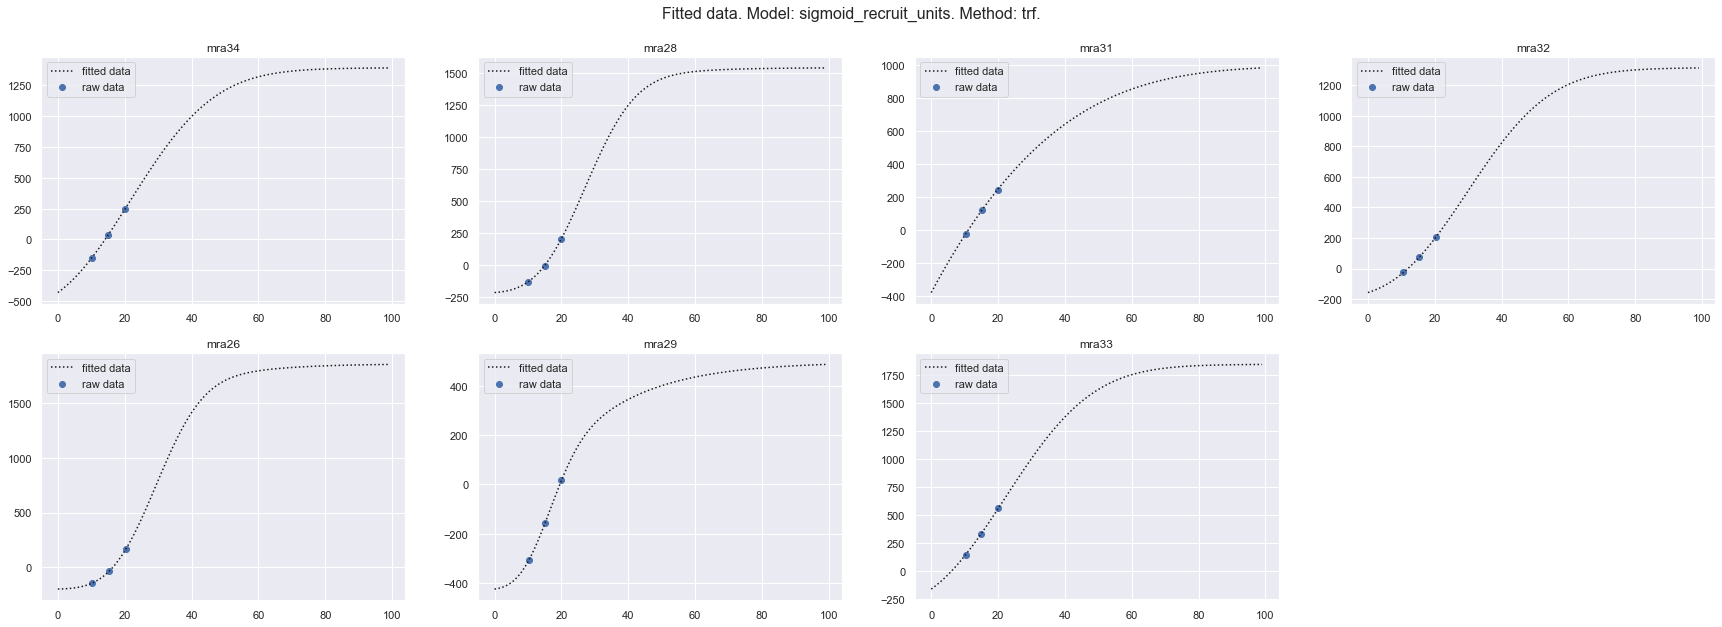

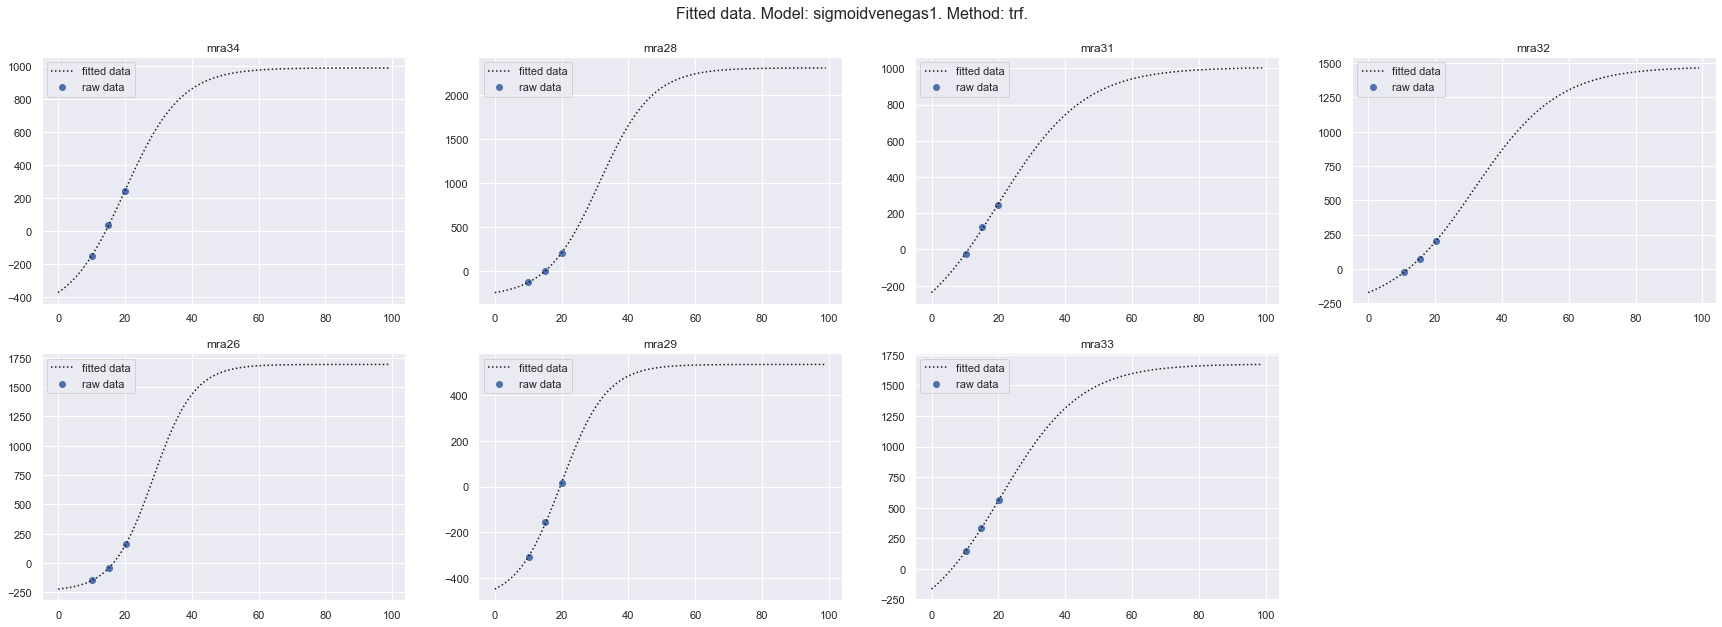

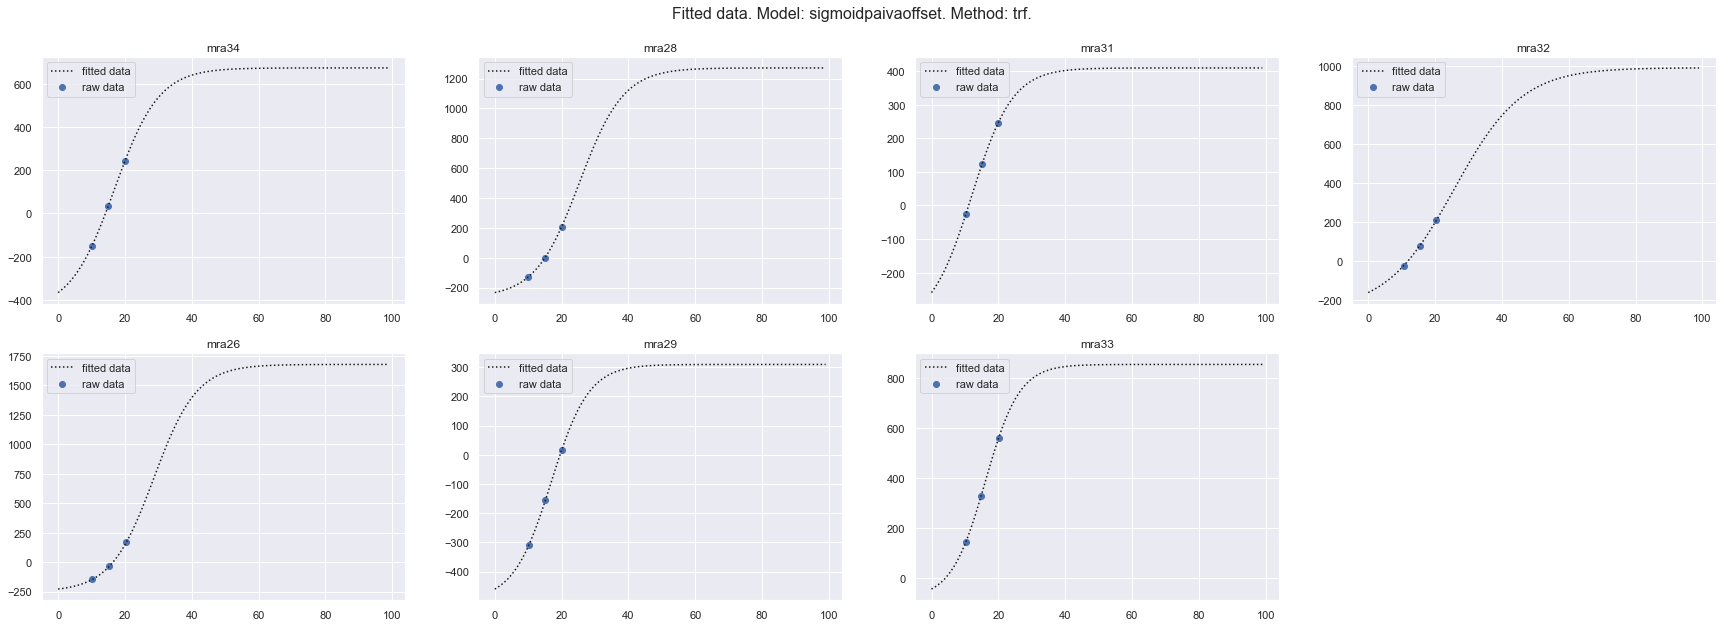

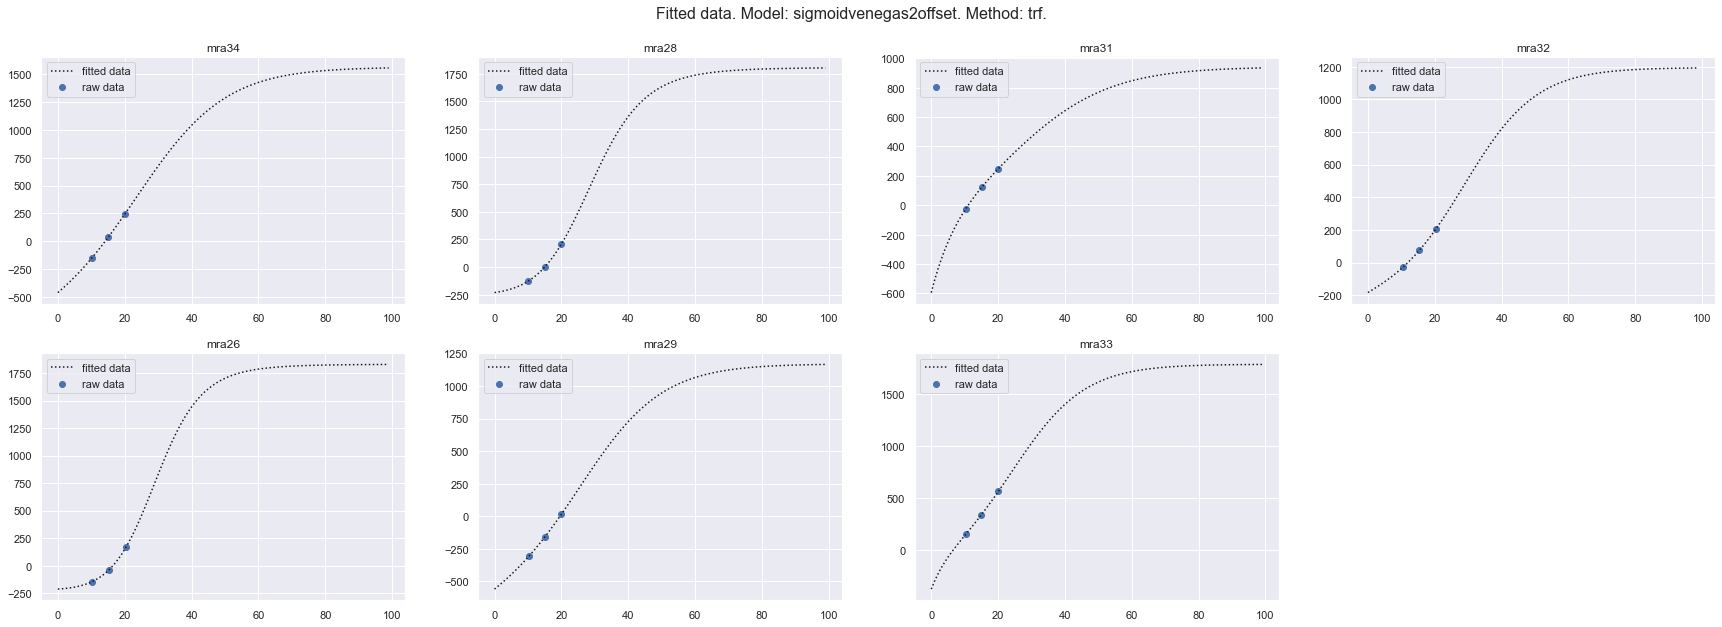

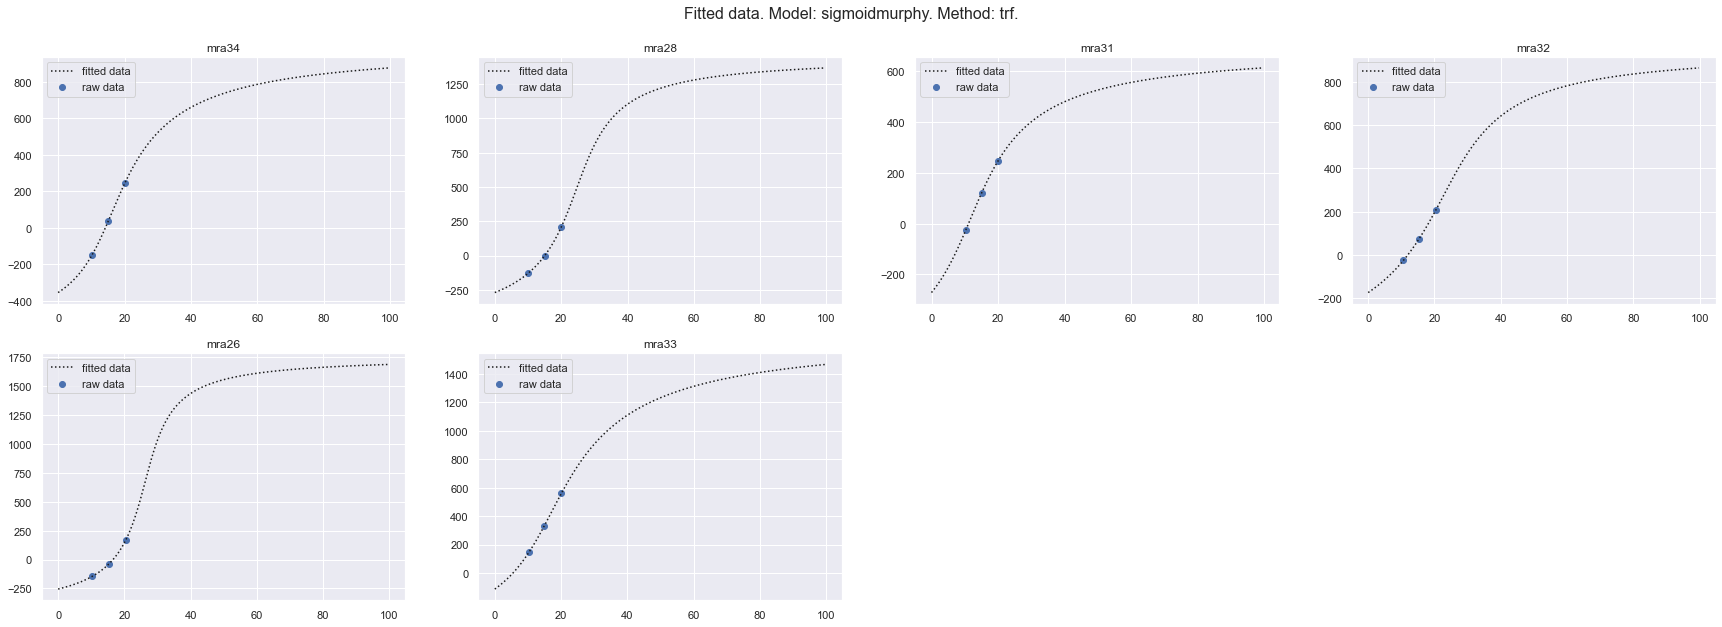

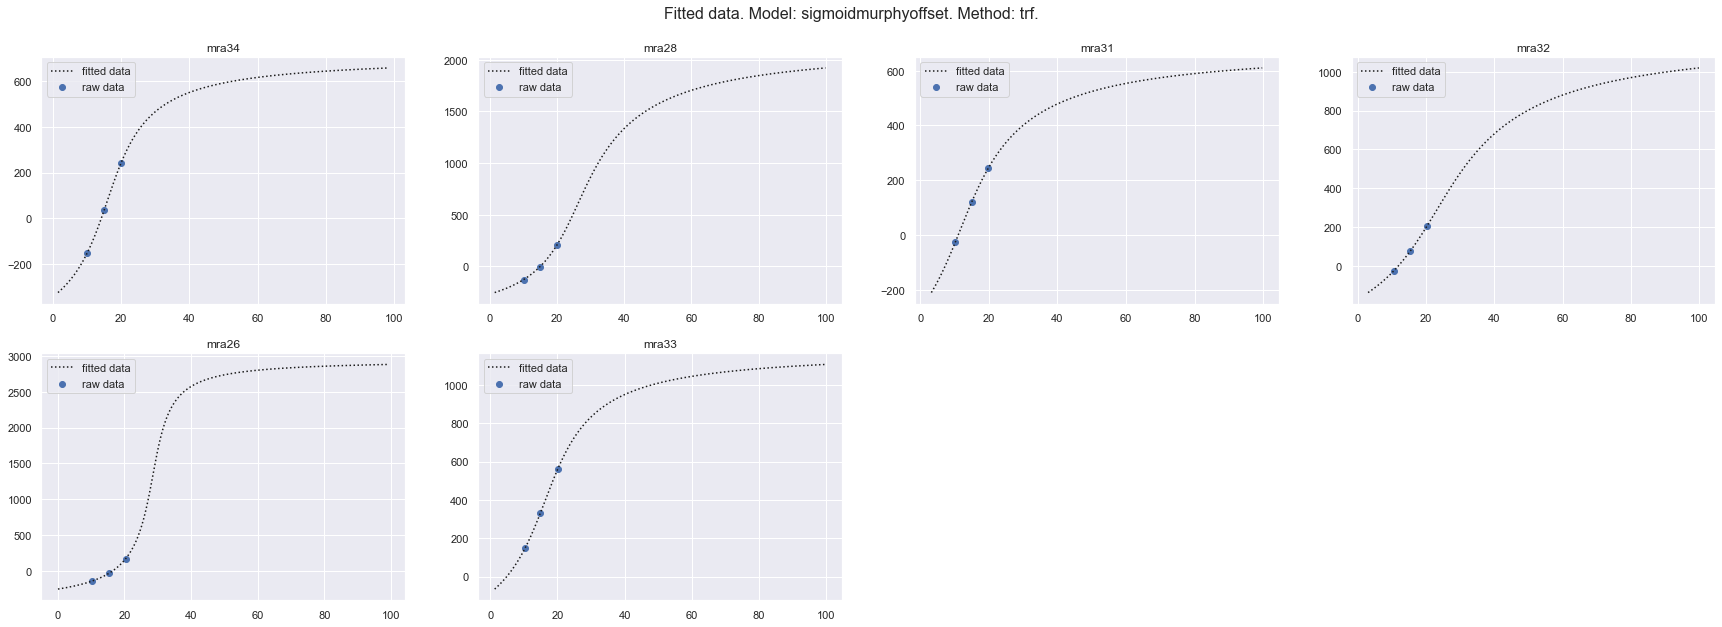

In [32]:
model_lst = [m.sigmoid_recruit_units, m.sigmoidvenegas1, m.sigmoidpaivaoffset, m.sigmoidvenegas2offset, m.sigmoidmurphy, m.sigmoidmurphyoffset]
for model in model_lst:
    plot_fitted_model(resultdf_indiv_fitted, modelo = model, nsteps = 3)

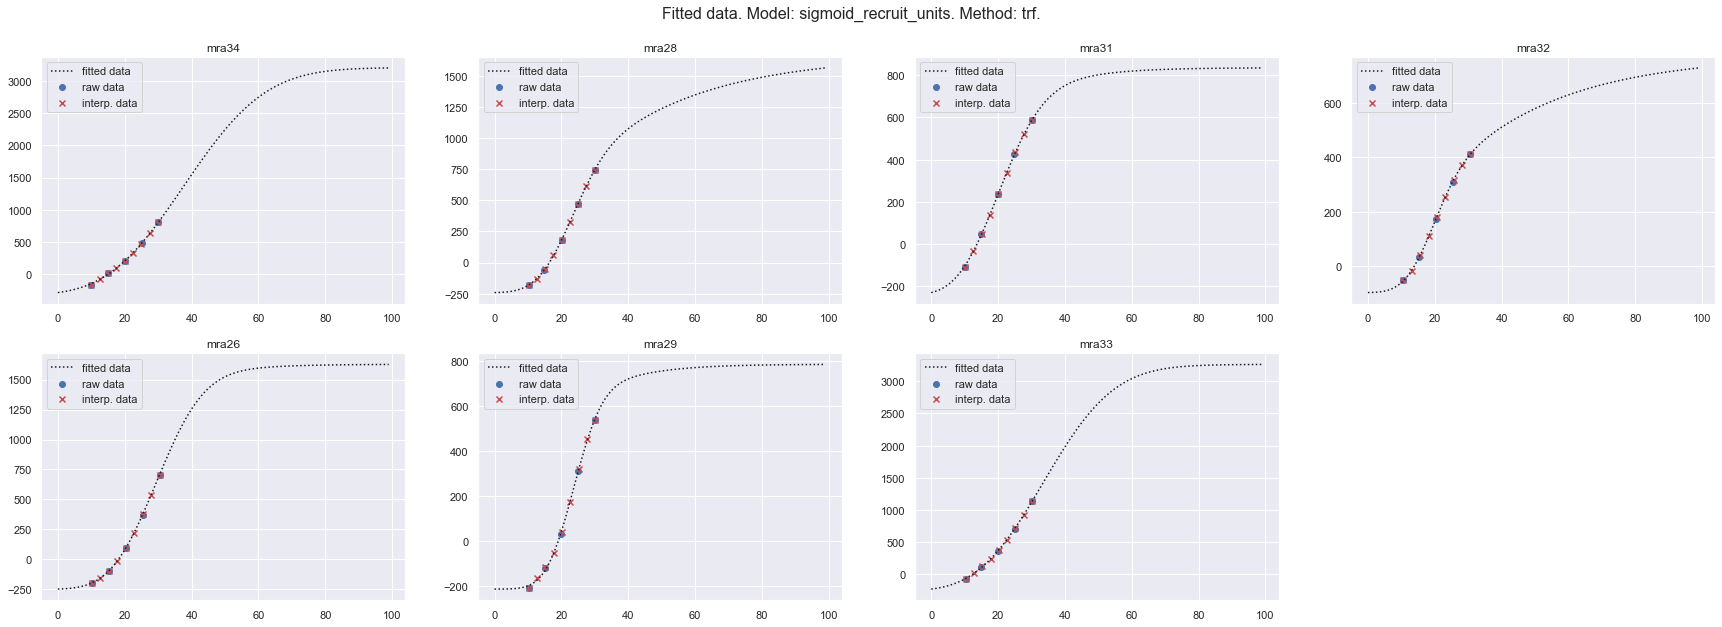

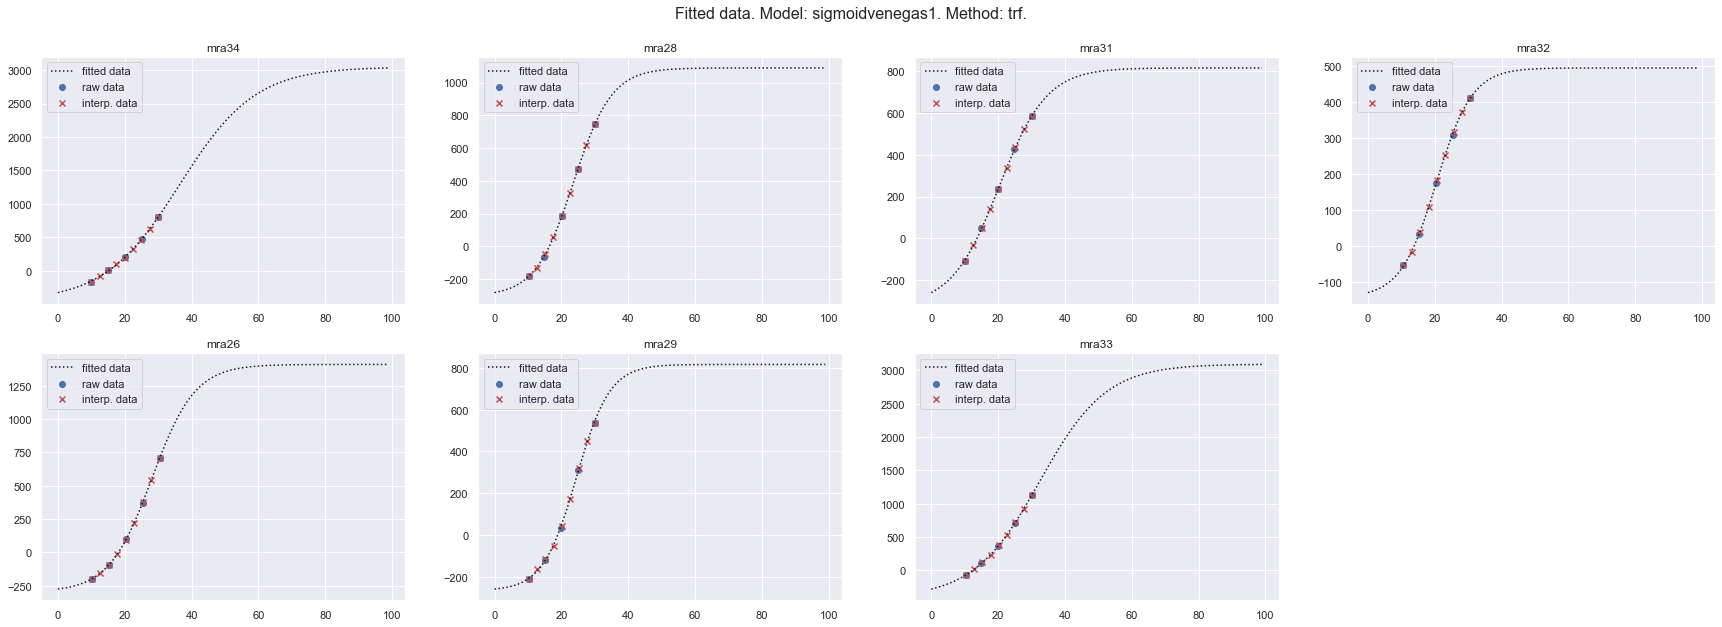

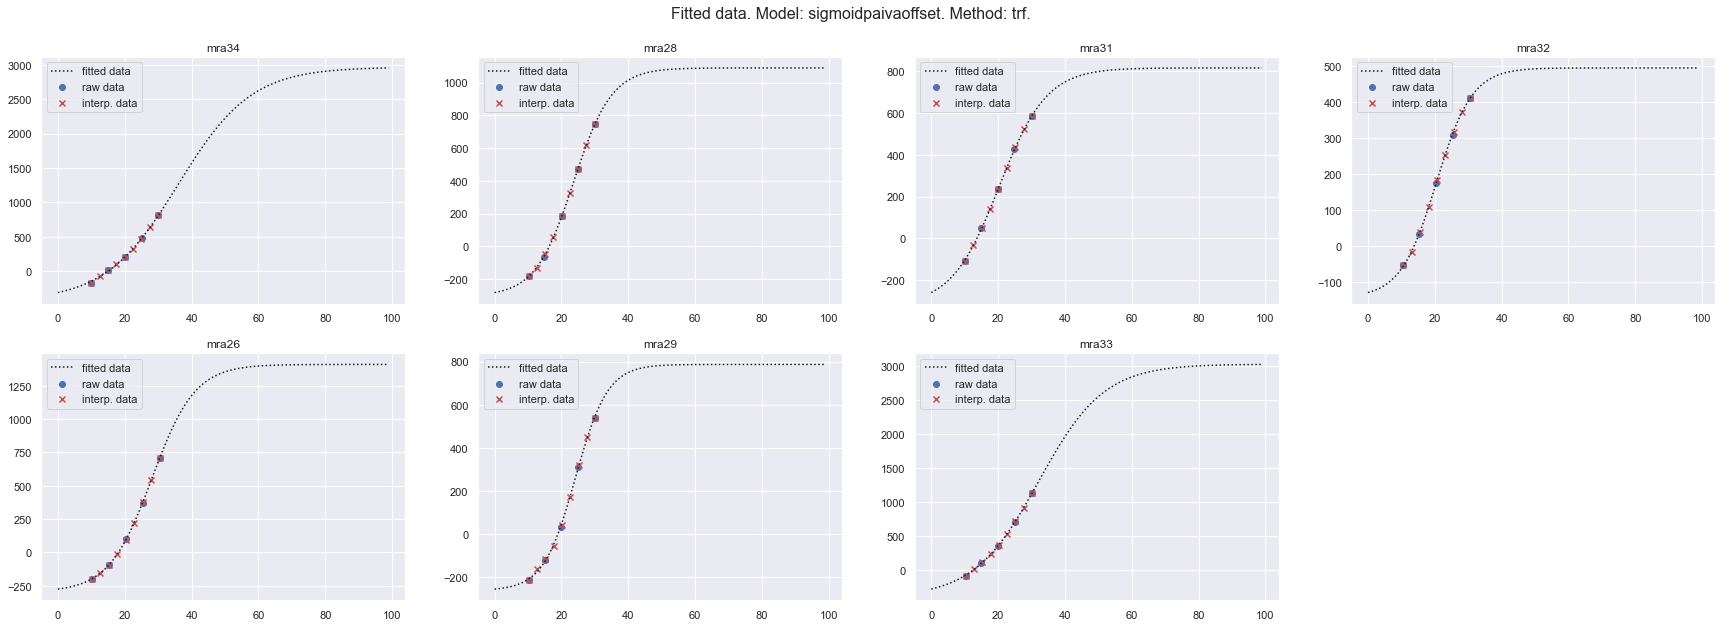

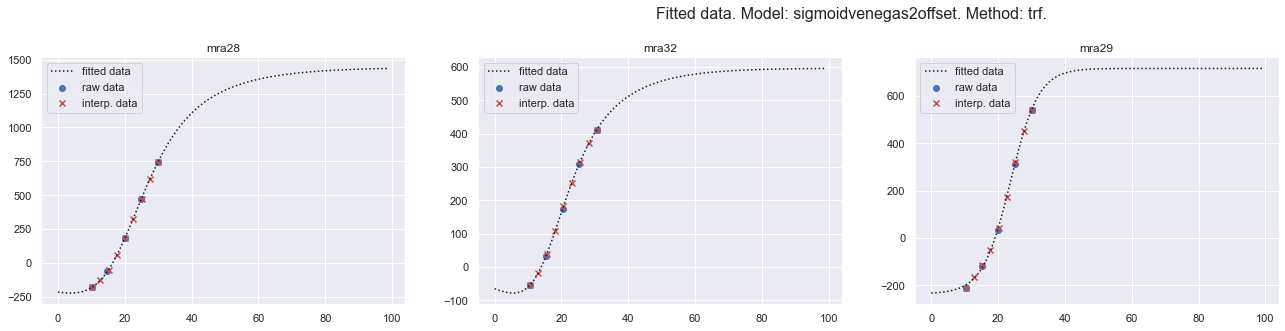

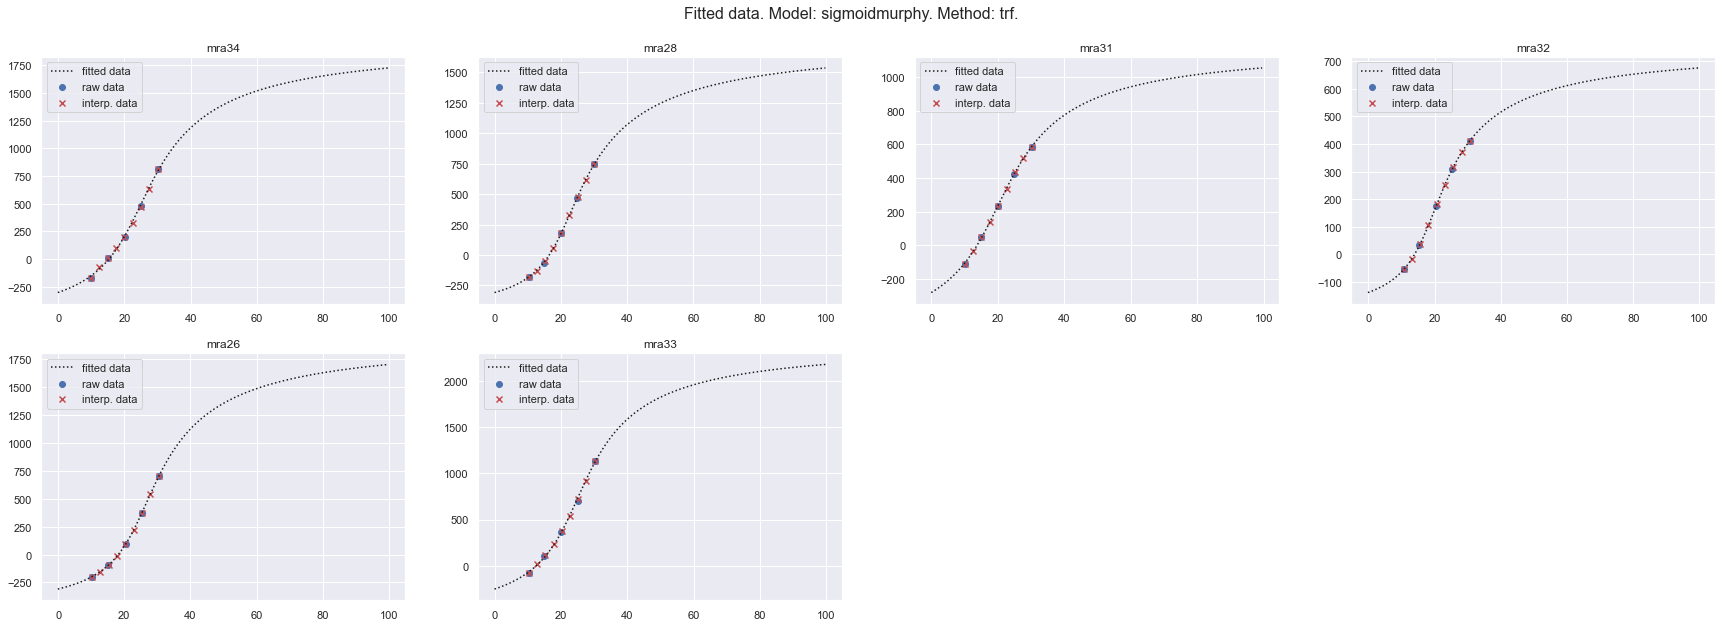

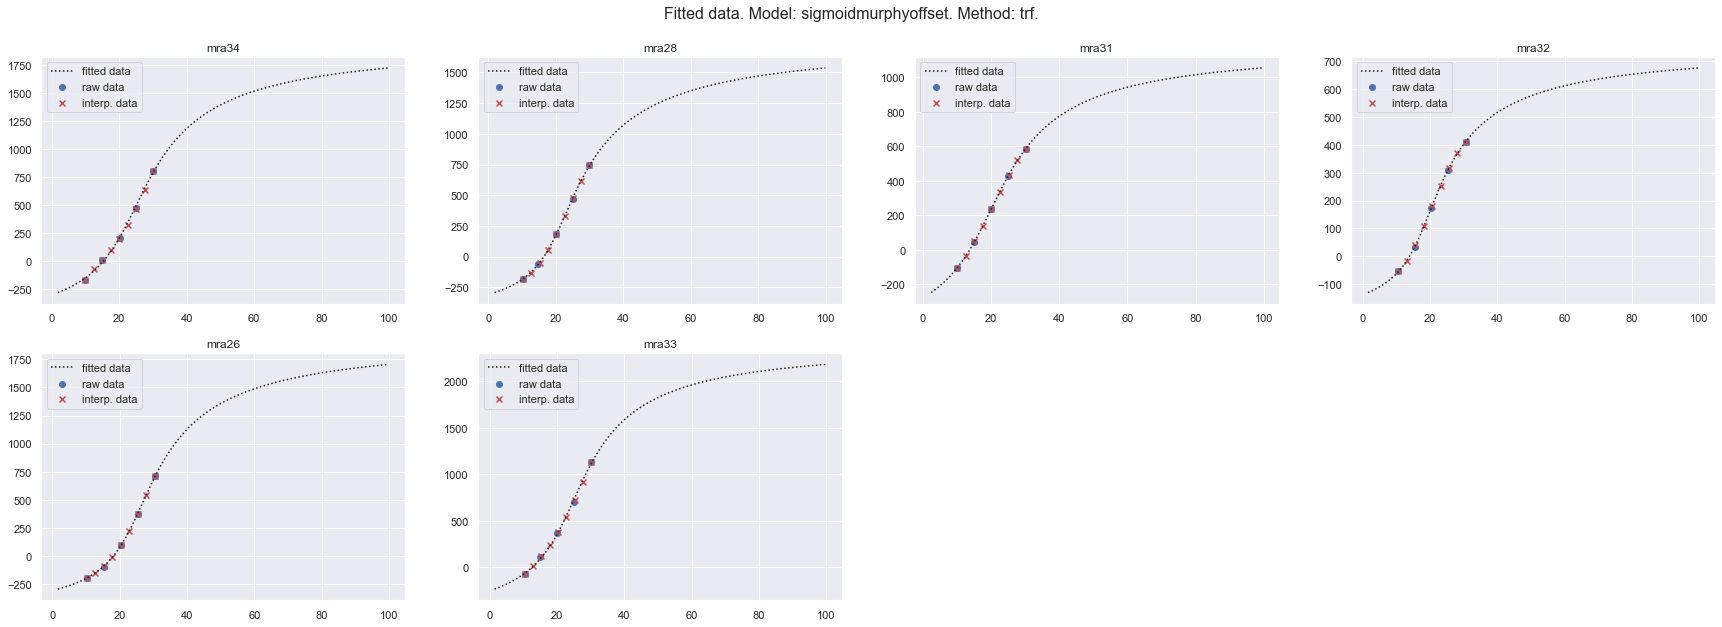

In [33]:
model_lst = [m.sigmoid_recruit_units, m.sigmoidvenegas1, m.sigmoidpaivaoffset, m.sigmoidvenegas2offset, m.sigmoidmurphy, m.sigmoidmurphyoffset]
for model in model_lst:
    plot_fitted_model(resultdf_indiv_fitted, modelo = model, ninterp = 1)

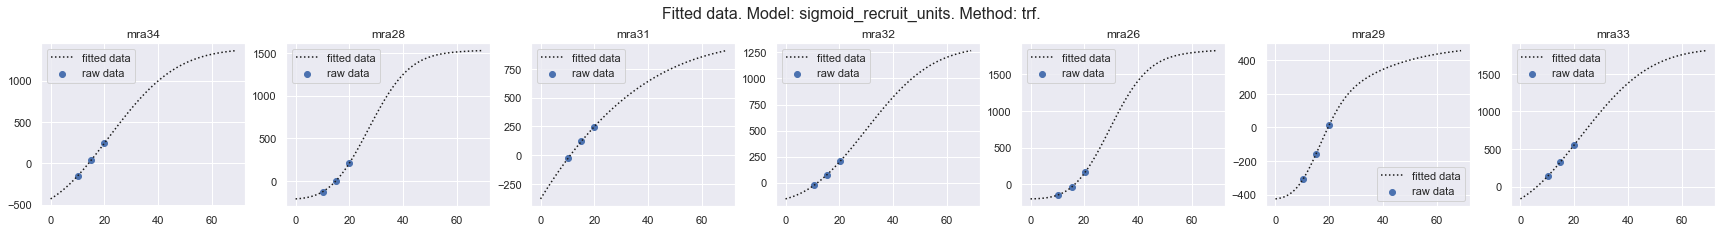

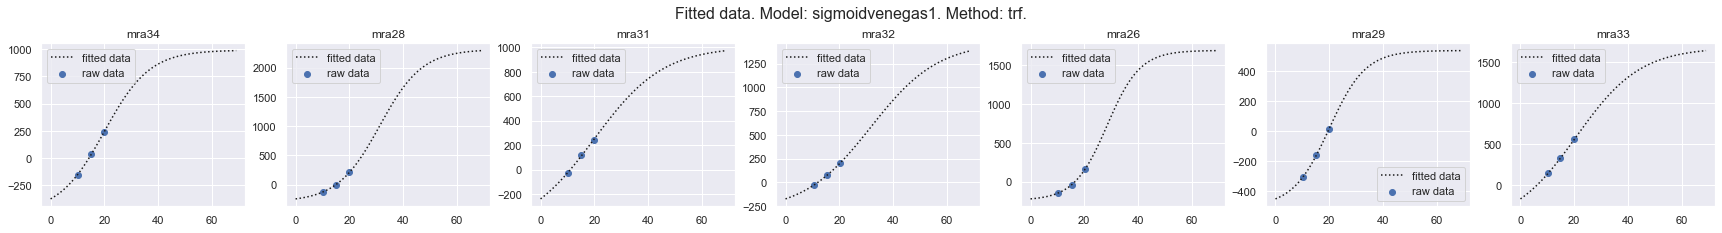

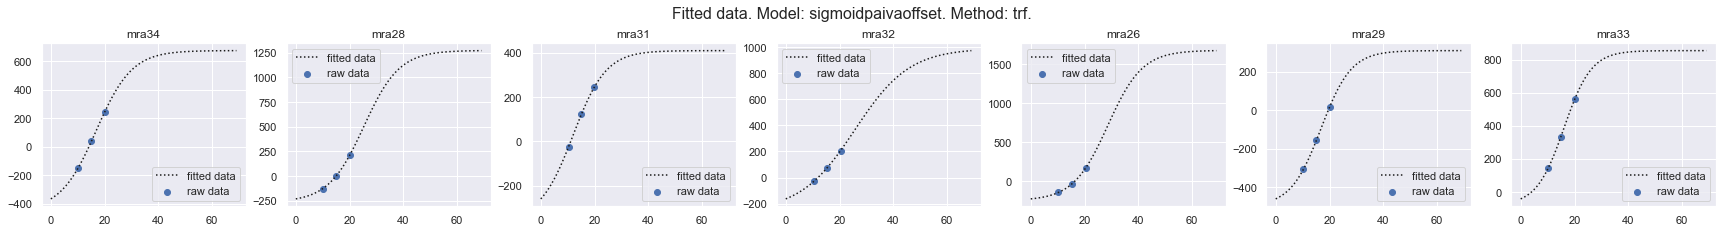

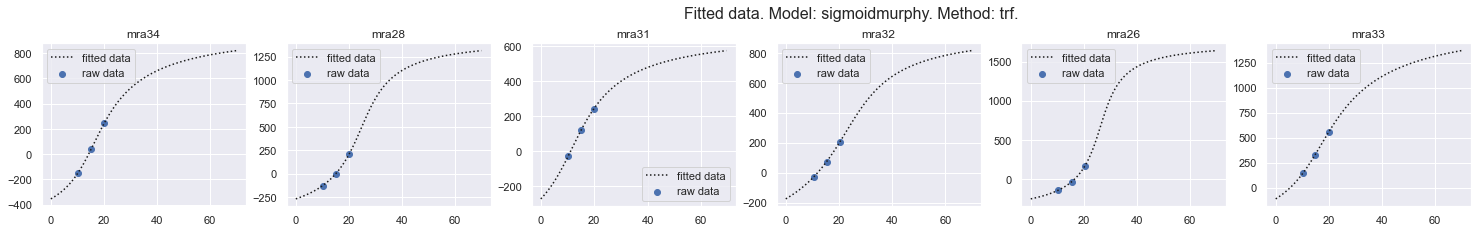

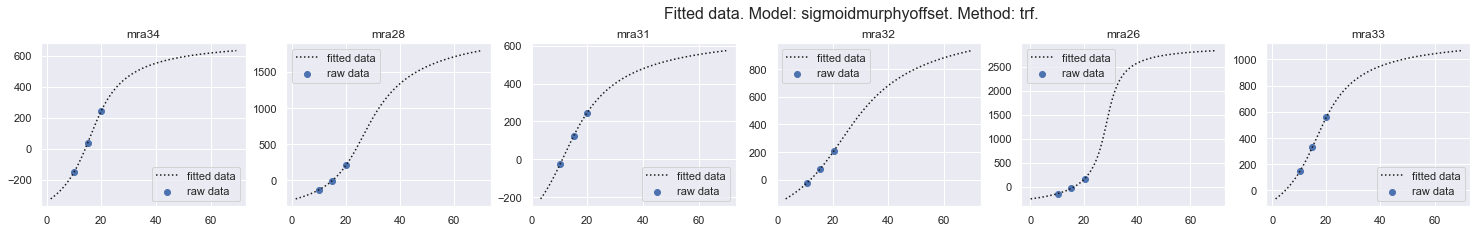

In [34]:
model_lst = [m.sigmoid_recruit_units, m.sigmoidvenegas1, m.sigmoidpaivaoffset, m.sigmoidvenegas2offset, m.sigmoidmurphy, m.sigmoidmurphyoffset]
for model in model_lst:
    plot_fitted_model(resultdf_indiv_fitted, modelo = model, nsteps = 3, nl=1, nc=7, y=1.05, h=3,pmax=70)

In [35]:
def plot_fitted_all(df, metodo = 'trf', nsteps = 5, ninterp = 0, pmax = 100, y=1.0, h=4.5, l=25):
    C2 = df['Method'] == metodo
    C3 = df['n_steps'] == nsteps
    C4 = df['N_points_interp'] == ninterp
    df_result = df[C2&C3&C4]
    
    model_lst = [m.sigmoid_recruit_units, m.sigmoidvenegas1, m.sigmoidpaivaoffset, m.sigmoidvenegas2offset, m.sigmoidmurphy, m.sigmoidmurphyoffset]
    order=('mra26','mra28','mra29','mra31','mra32','mra33','mra34')
    
    nl = len(order)
    nc = len(model_lst)
    
    fig, axs = plt.subplots(nl,nc,sharex='col', sharey='row', figsize=(l,h*len(order)) )
        
    ax_lst = []
    count = 0
    for idl,animal in enumerate(order):
        for idc,modelo in enumerate(model_lst):
            df_model = df_result[df_result['Model']==modelo.__name__]
            if animal in df_model['Animal'].values:
                count = count + 1
                row = df_model[df_model['Animal']==animal].squeeze()
                p_data = row['Pressures']
                v_data = row['Volumes']
                axs[idl,idc].scatter(p_data, v_data, label='raw data')
                if ninterp > 0:
                    p_interp, v_interp = m.interpola_PV(p_data,v_data,ninterp)
                    axs[idl,idc].scatter(p_interp,v_interp,label='interp. data',c='r',marker='x')

                param = row['parameters']
                if (modelo.__name__=='sigmoidmurphy') or (modelo.__name__=='sigmoidmurphyoffset'):
                    v_min,v_max = m.encontra_volumes_limites_Murphy(param,modelo=modelo,pmax=pmax)
                    v = np.asarray(range(v_min,v_max))
                    p = modelo(v,*param)
                    axs[idl,idc].plot(p, v, 'k:', label='fitted data')
                else:
                    p = range(0,pmax)
                    v = modelo(p,*param)
                    axs[idl,idc].plot(p, v, 'k:', label='fitted data')
                
                if ninterp == 0:
                    axs[idl,idc].legend(('raw data','fitted data'))
                else:
                    axs[idl,idc].legend(('raw data','fitted data','interp. data'))
                    
            if idc == 0:
                axs[idl,idc].set(ylabel=f'{order[idl]}\nVolume [$mL$]')
            if idl == nl-1:
                axs[idl,idc].set(xlabel=f'Pressure [$cmH_2O$]\n{modelo.__name__}')
                
                
    plt.suptitle(f'Fitted models. Method: {metodo}; steps: {nsteps}; interpolated points: {ninterp}', fontsize=16, y=y)
    plt.subplots_adjust(hspace=0.03, wspace=0.03)
    fig.tight_layout()
    #plt.show()
    return fig

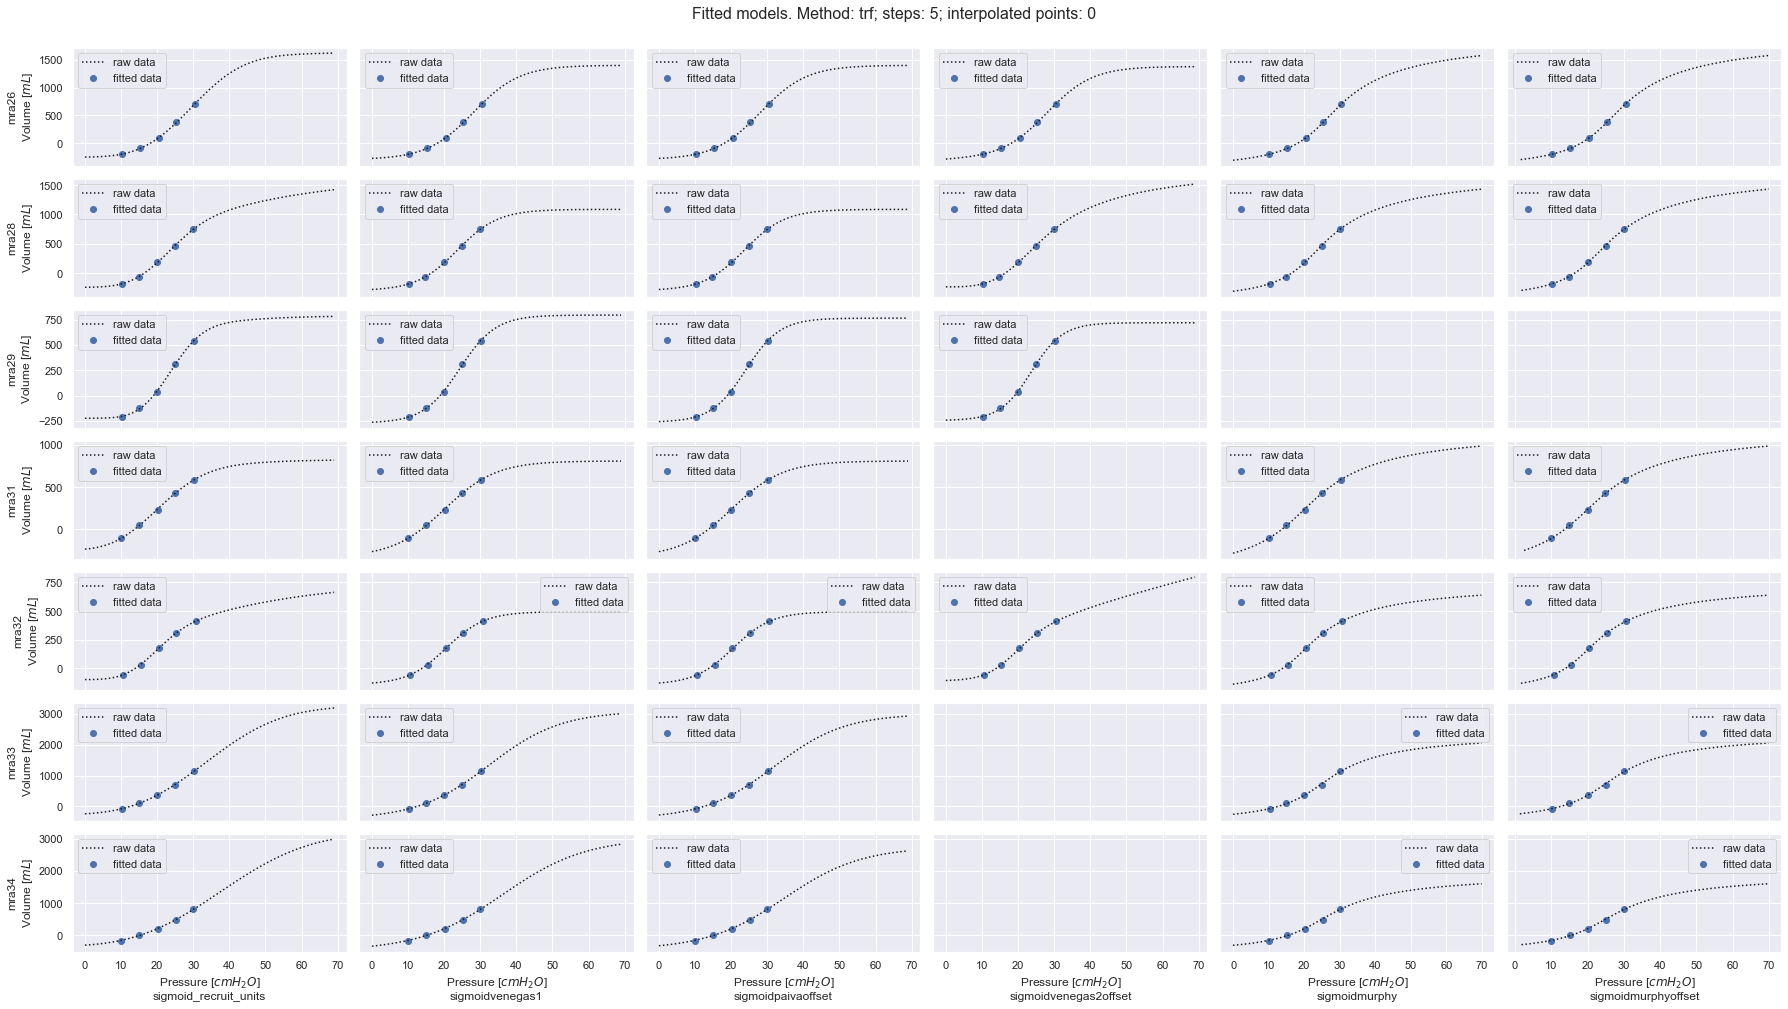

In [36]:
_= plot_fitted_all(resultdf_indiv_fitted, nsteps = 5, pmax=70, h=2, y=1)

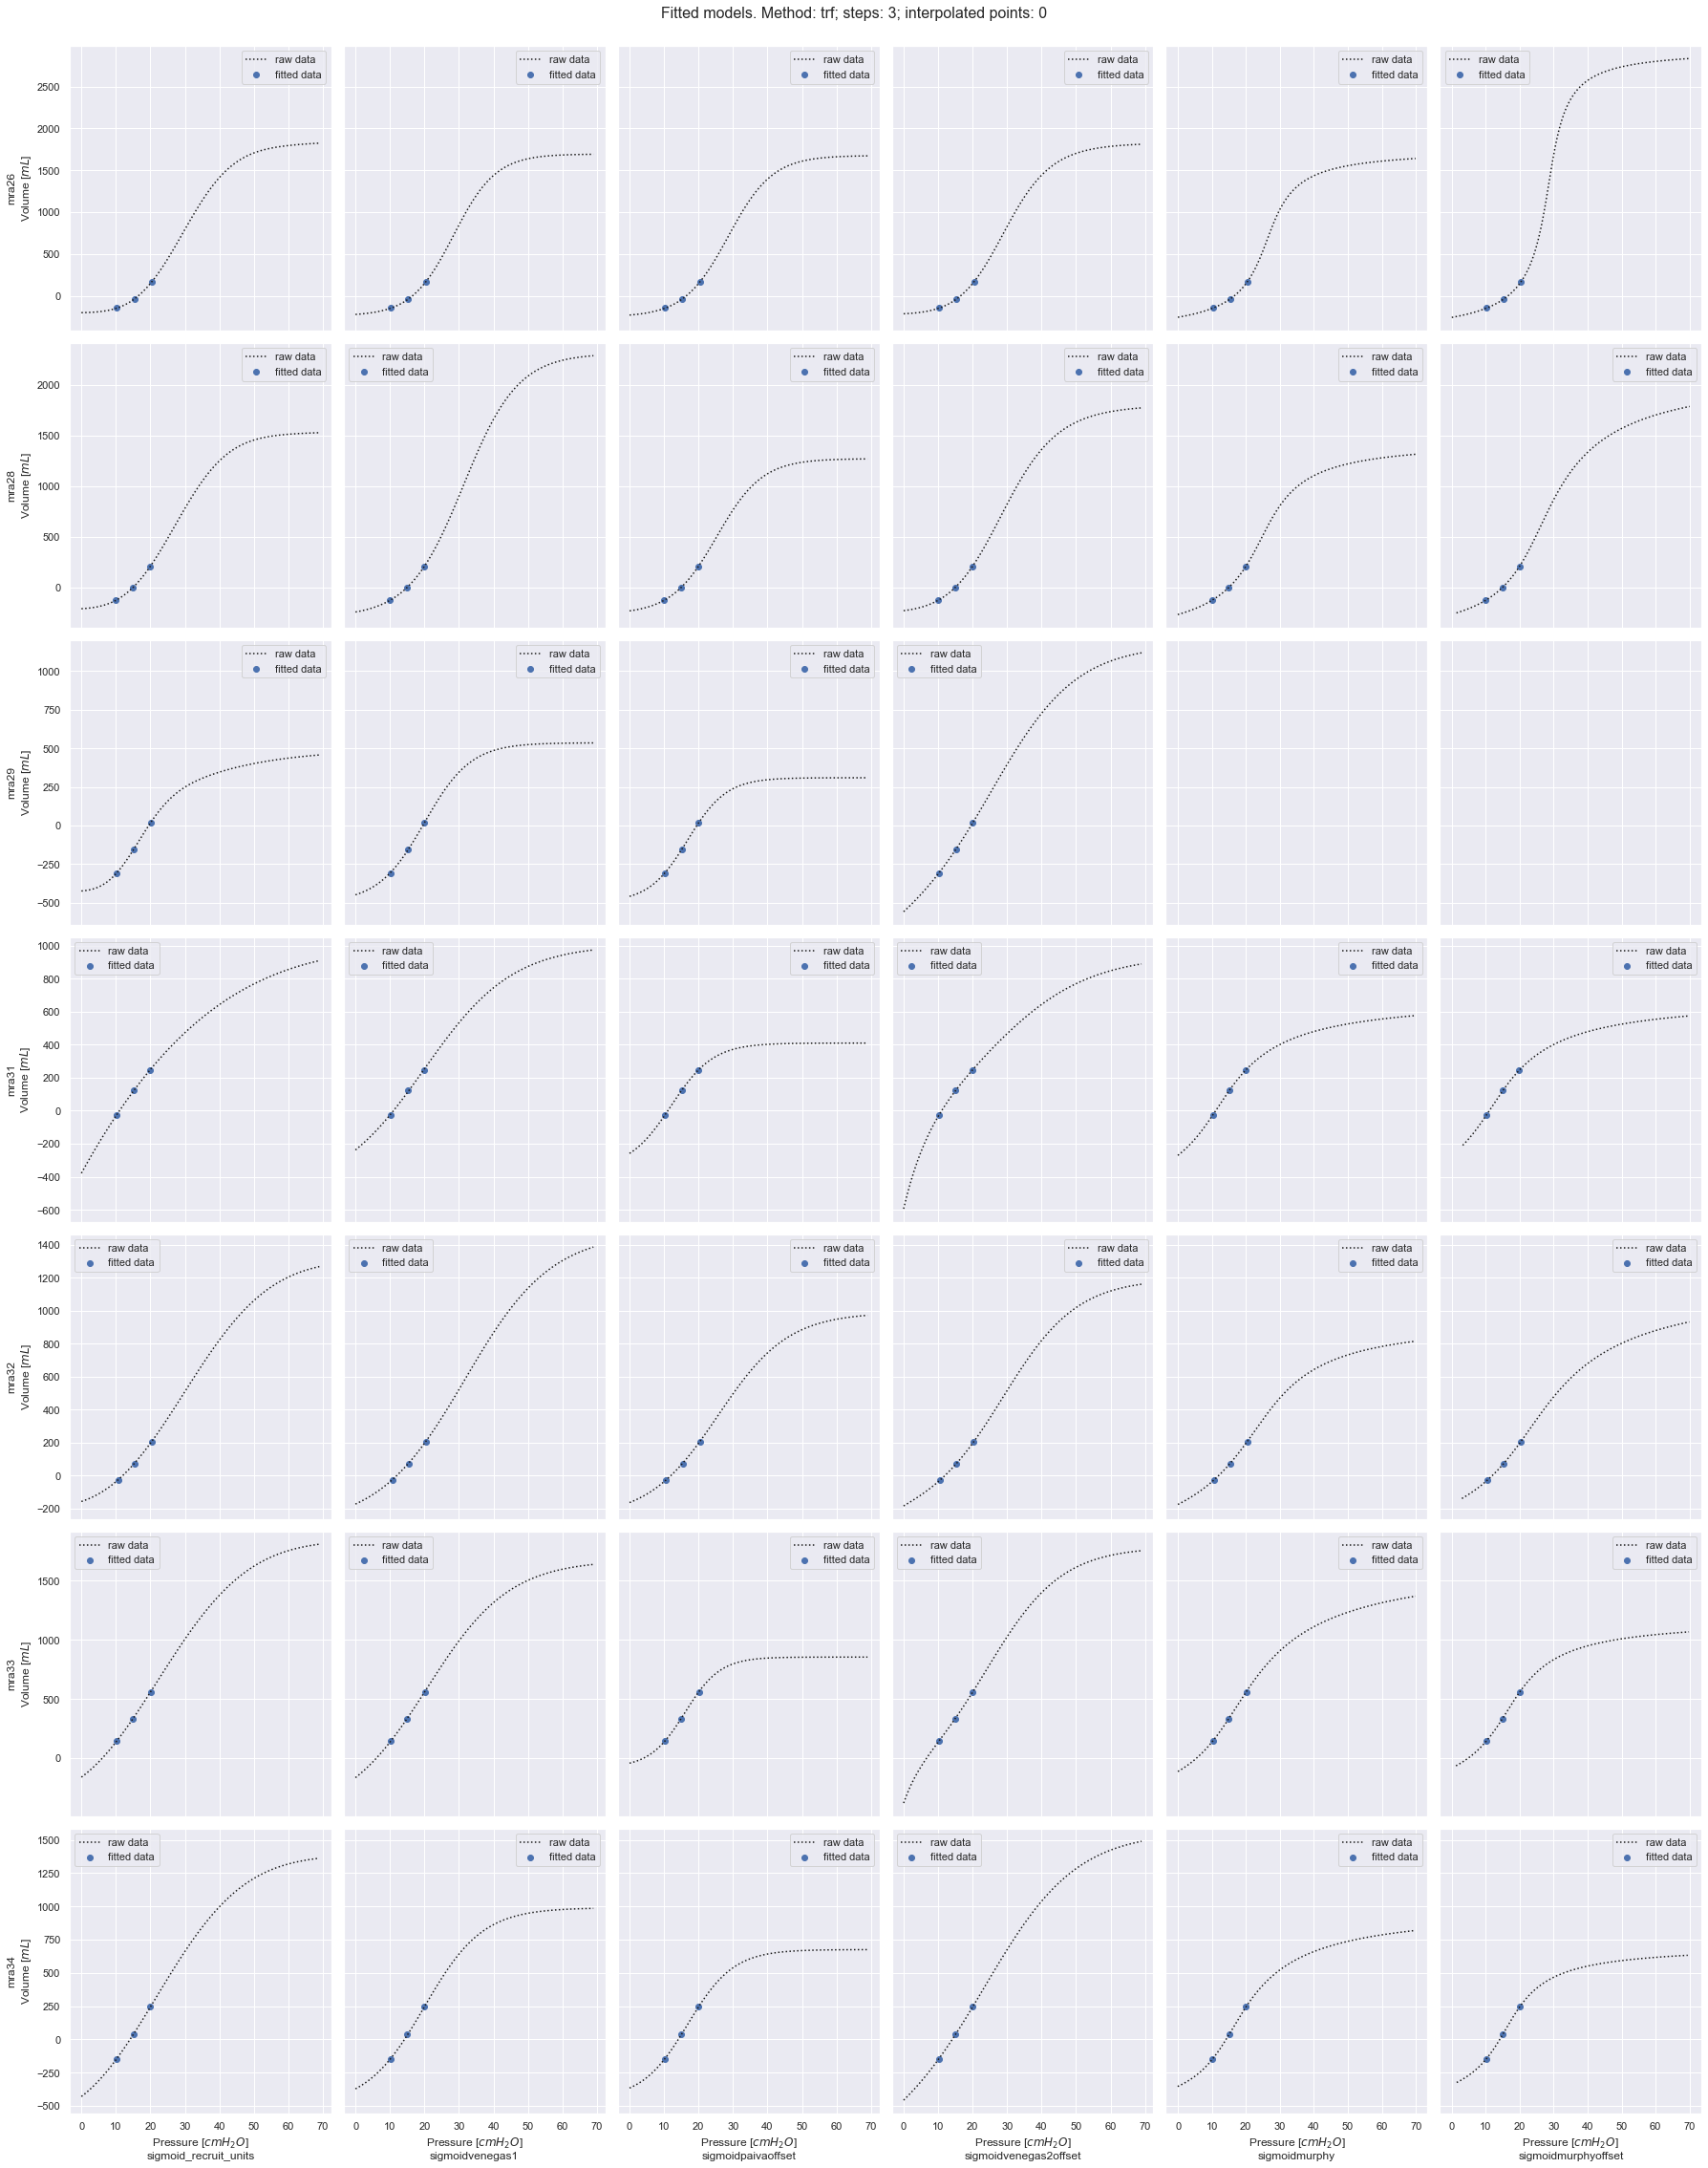

In [37]:
_= plot_fitted_all(resultdf_indiv_fitted, nsteps = 3, pmax=70)

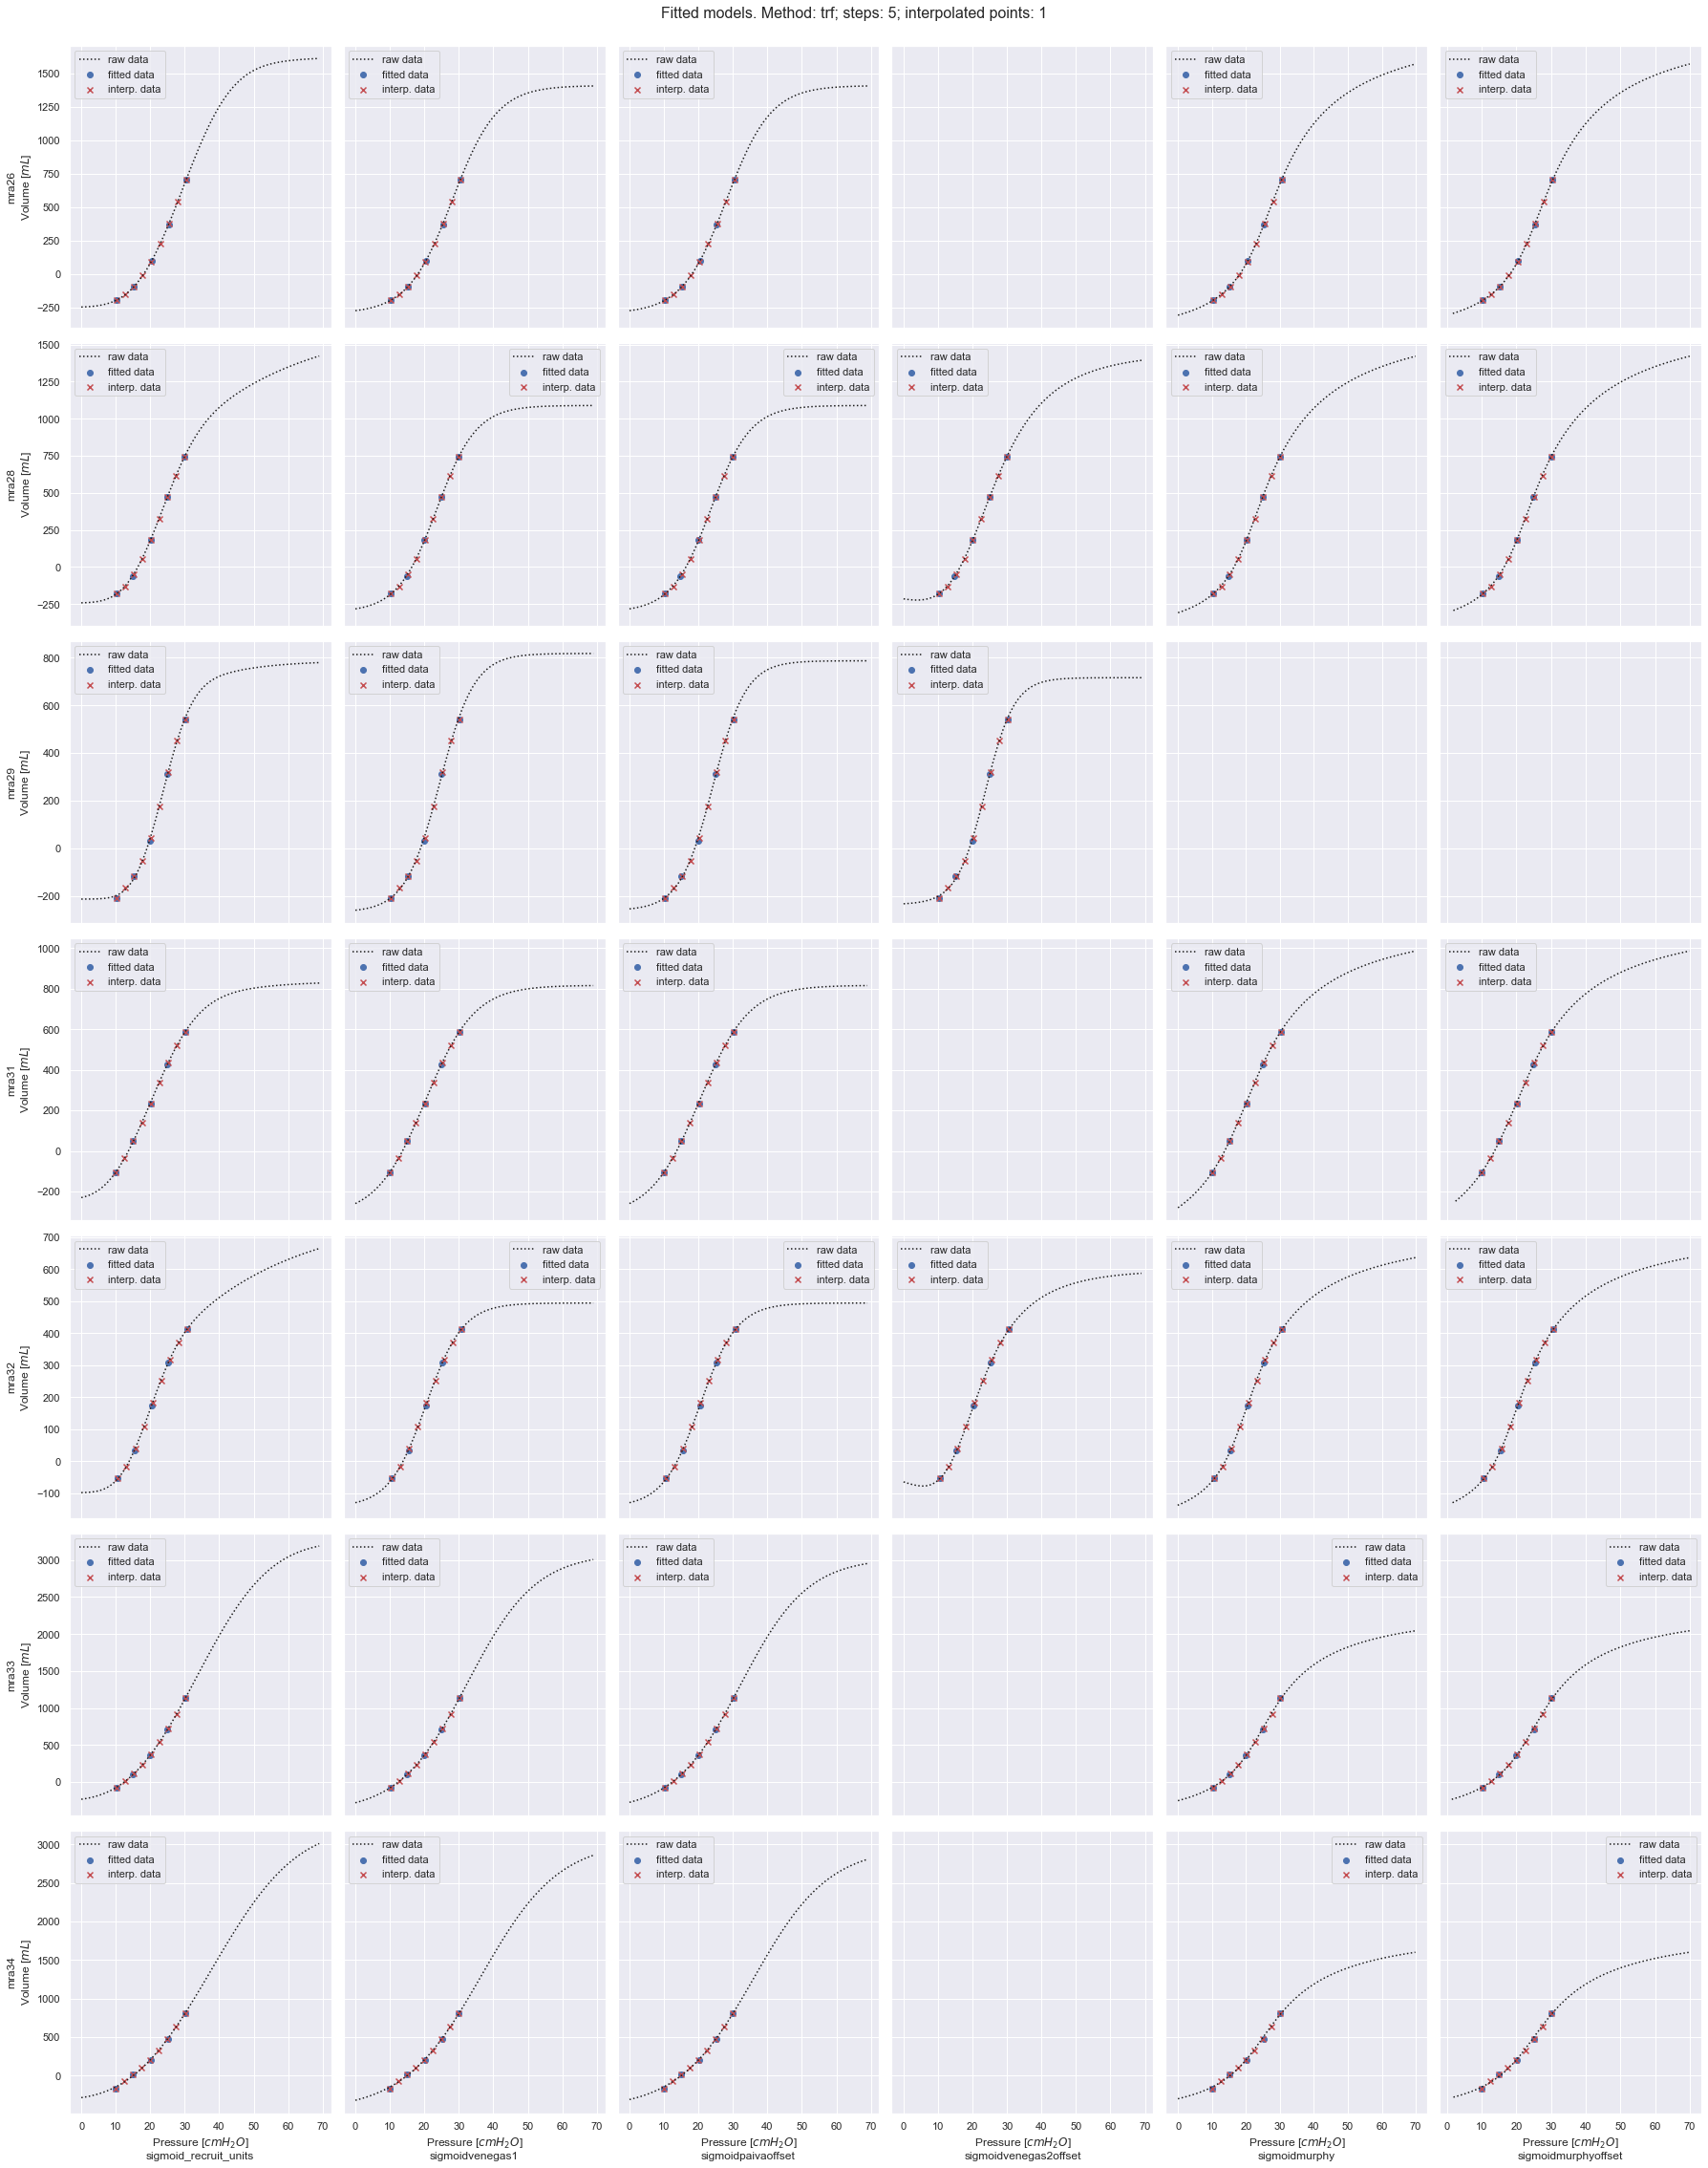

In [38]:
_= plot_fitted_all(resultdf_indiv_fitted, nsteps = 5, pmax=70, ninterp = 1)

In [39]:
if True: # já gravadas... 4m16s
    metodo_lst = ('lm','trf','dogbox')
    ninterp_lst = (0, 1, 2, 10, 20)
    nsteps_lst = (3, 4, 5)
    pasta_fig = '/mnt/hdsda3/arquivos/Recrutamento/figuras/anexo/'
    for metodo in metodo_lst:
        for ninterp in ninterp_lst:
            for nsteps in nsteps_lst:
                fig = plot_fitted_all(resultdf_indiv_fitted, metodo = metodo, nsteps = nsteps, ninterp = ninterp, pmax=100)
                fig.tight_layout()
                fig.savefig(pasta_fig+f'fit_all_{metodo}_{nsteps}_{ninterp}.png')
                plt.close(fig)

### Erros na estimativa da TLC

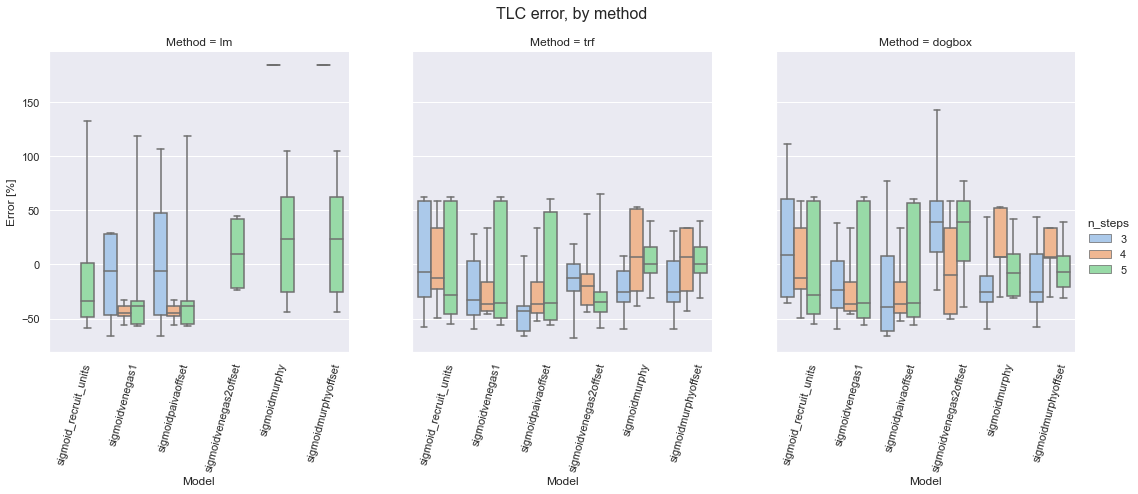

In [51]:
ax2 = sns.catplot(x="Model", y="error", kind="box", 
                  whis = 10, col='Method', hue='n_steps', palette="pastel",
                  data=resultdf_indiv_fitted)
ax2.set_xticklabels(rotation=75)
ax2.set_ylabels('Error [%]')#, fontsize=15) # 
plt.suptitle('TLC error, by method', fontsize=16, y=1.05)
plt.show()

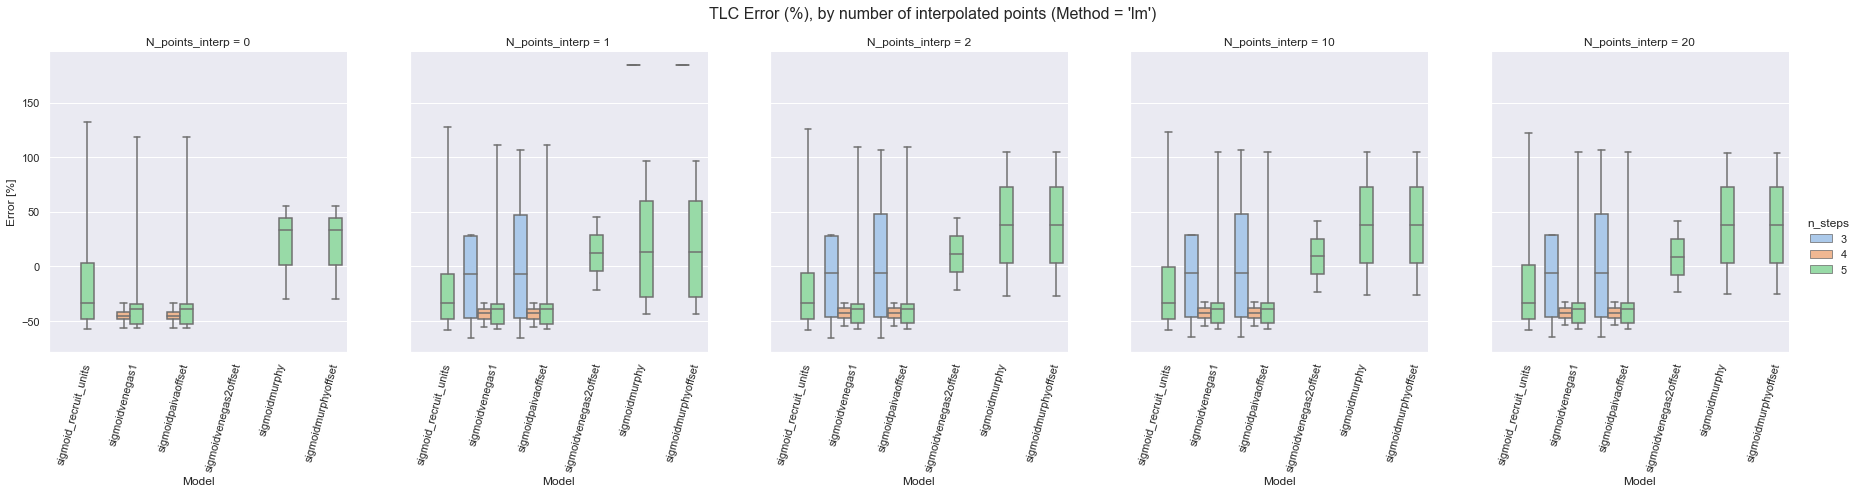

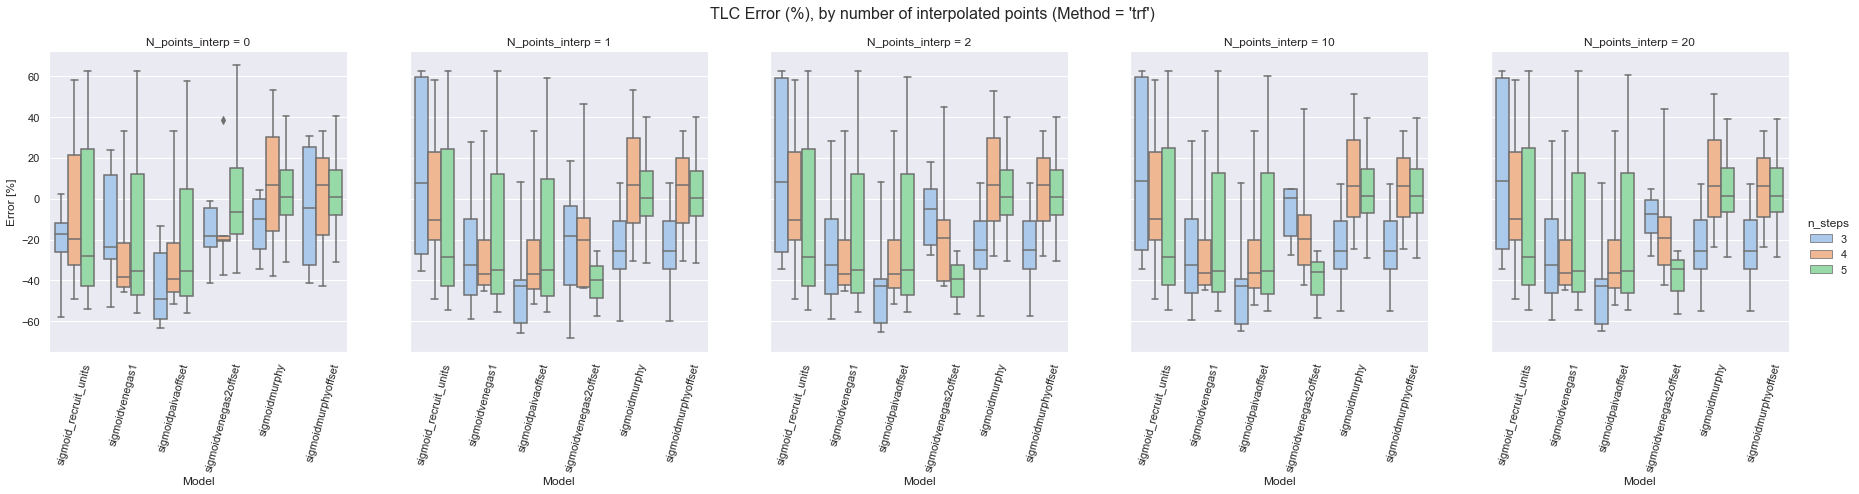

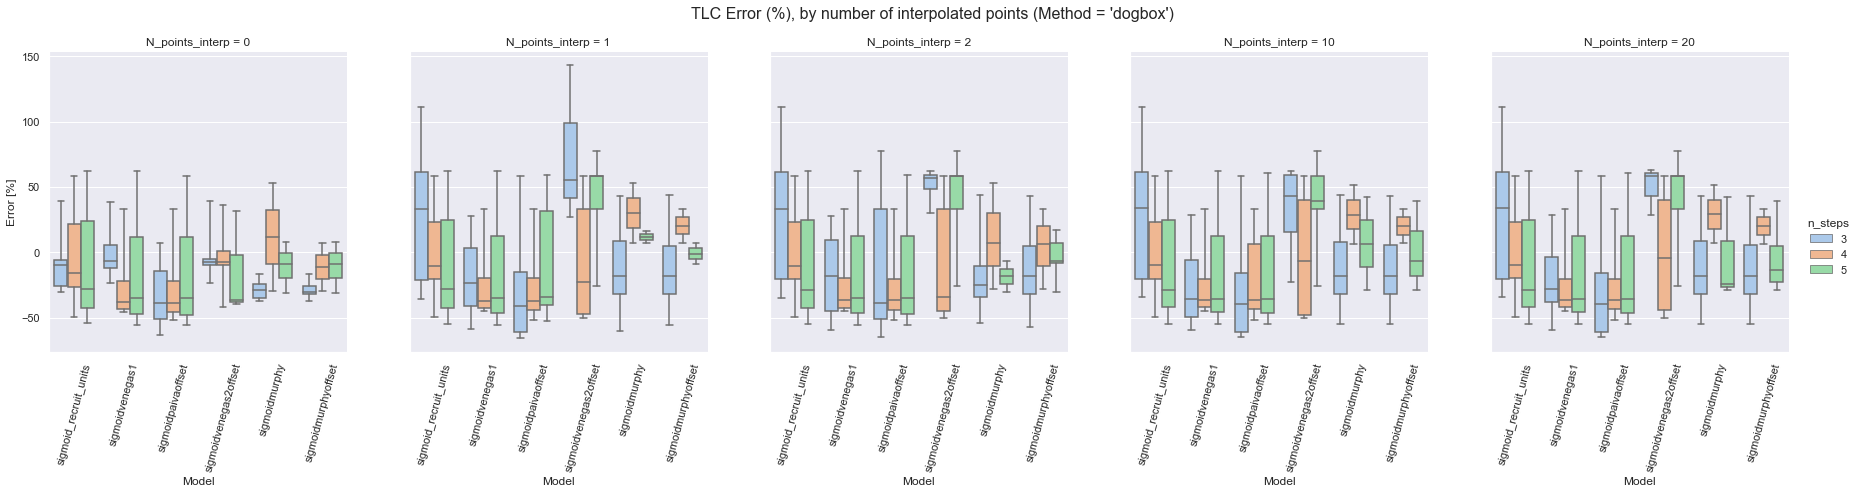

In [54]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 10, col='N_points_interp', hue='n_steps', palette="pastel",
                      data=df)
    ax2.set_xticklabels(rotation=75)
    ax2.set_ylabels('Error [%]')#, fontsize=15) # 
    plt.suptitle('TLC Error (%), by number of interpolated points (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

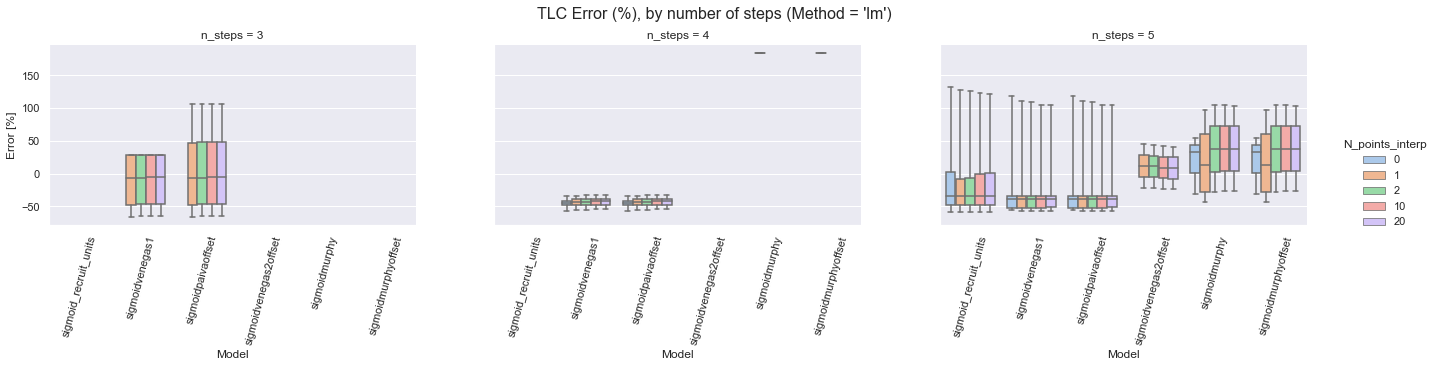

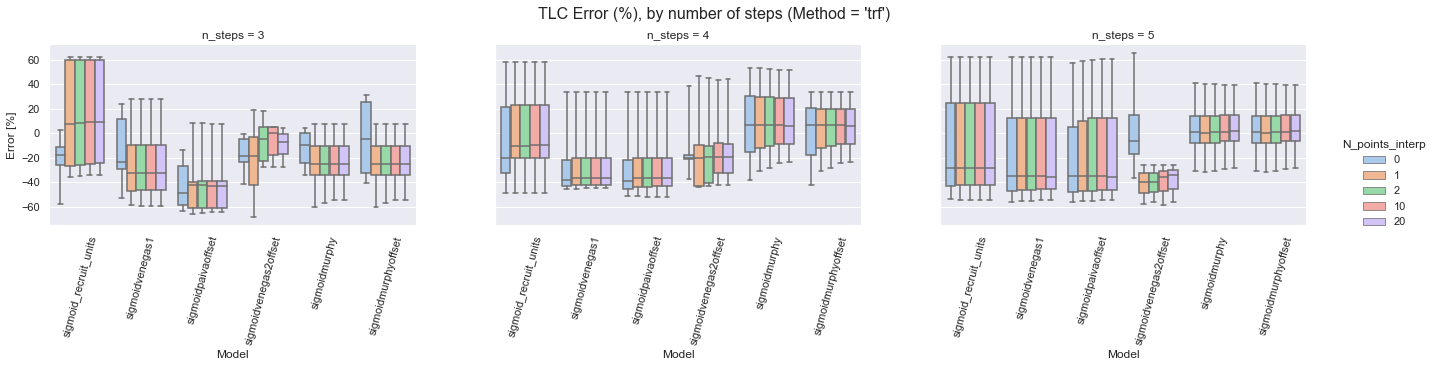

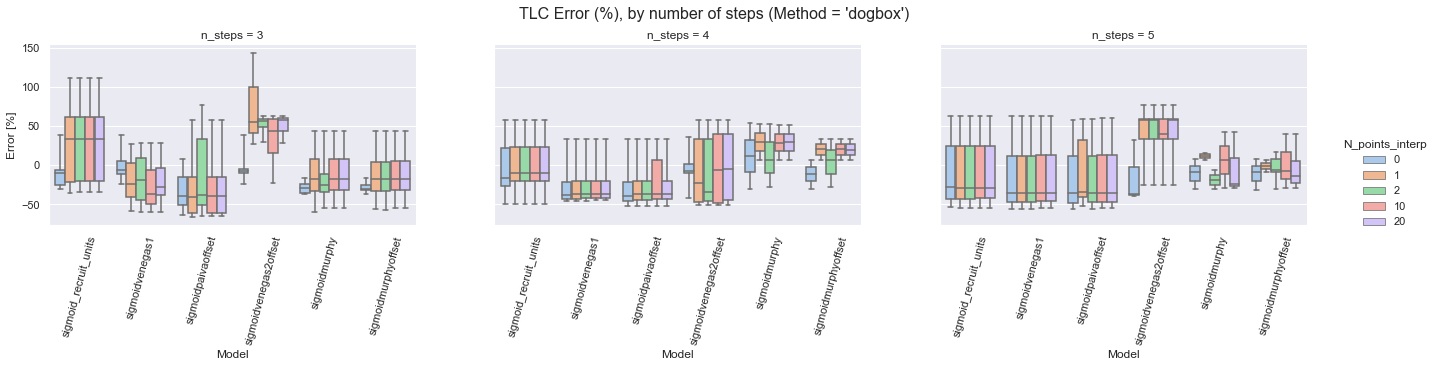

In [55]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 100, col='n_steps', hue='N_points_interp', palette="pastel",
                      data=df)
    ax2.set_xticklabels(rotation=75)
    ax2.set_ylabels('Error [%]')#, fontsize=15) # 
    plt.gcf().set_size_inches(20,3)
    plt.suptitle('TLC Error (%), by number of steps (Method = \''+met+'\')', fontsize=16, y=1.1)
    plt.show()

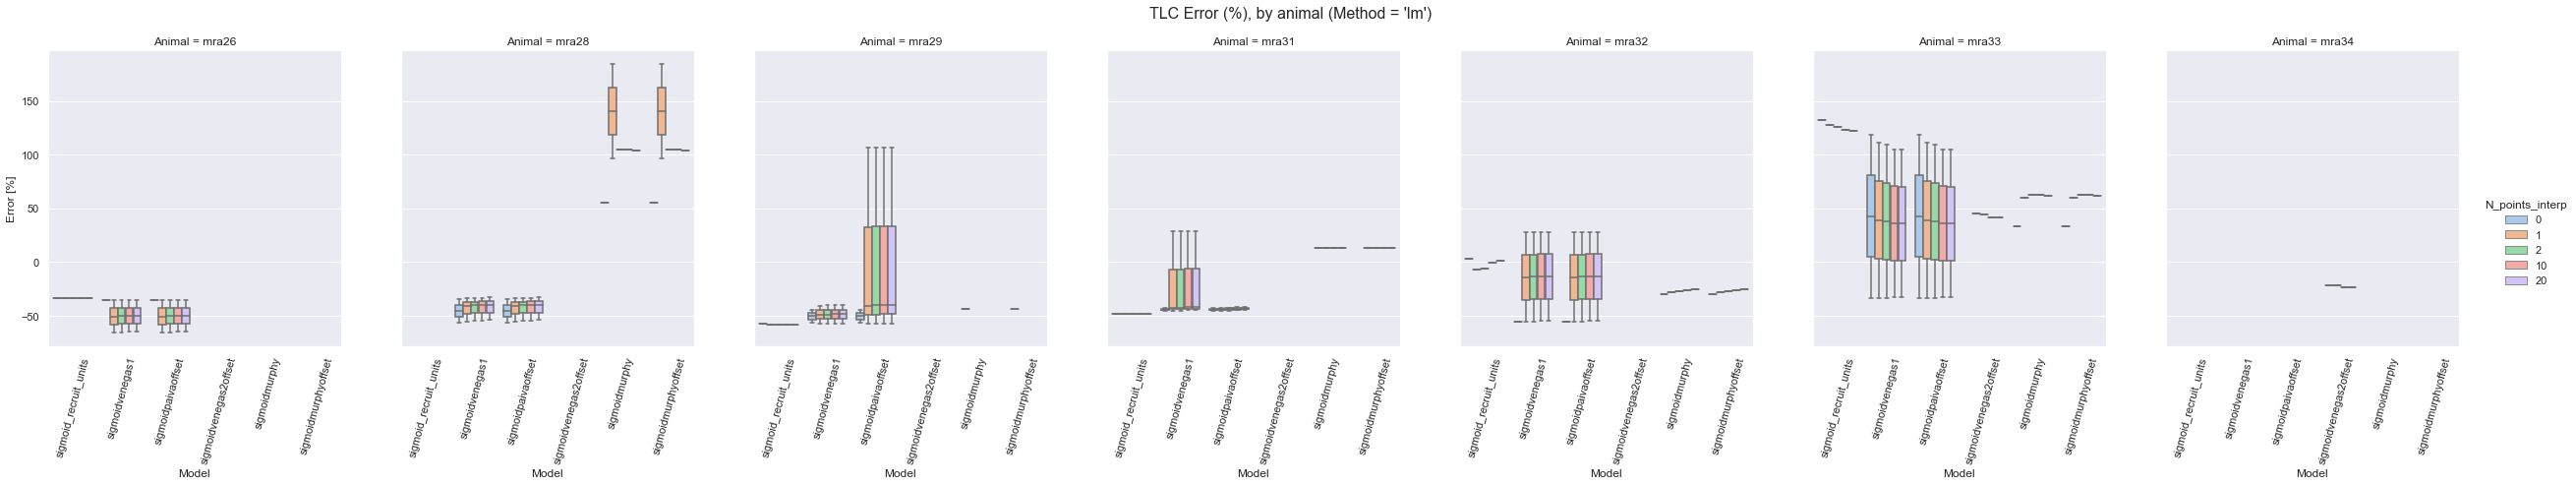

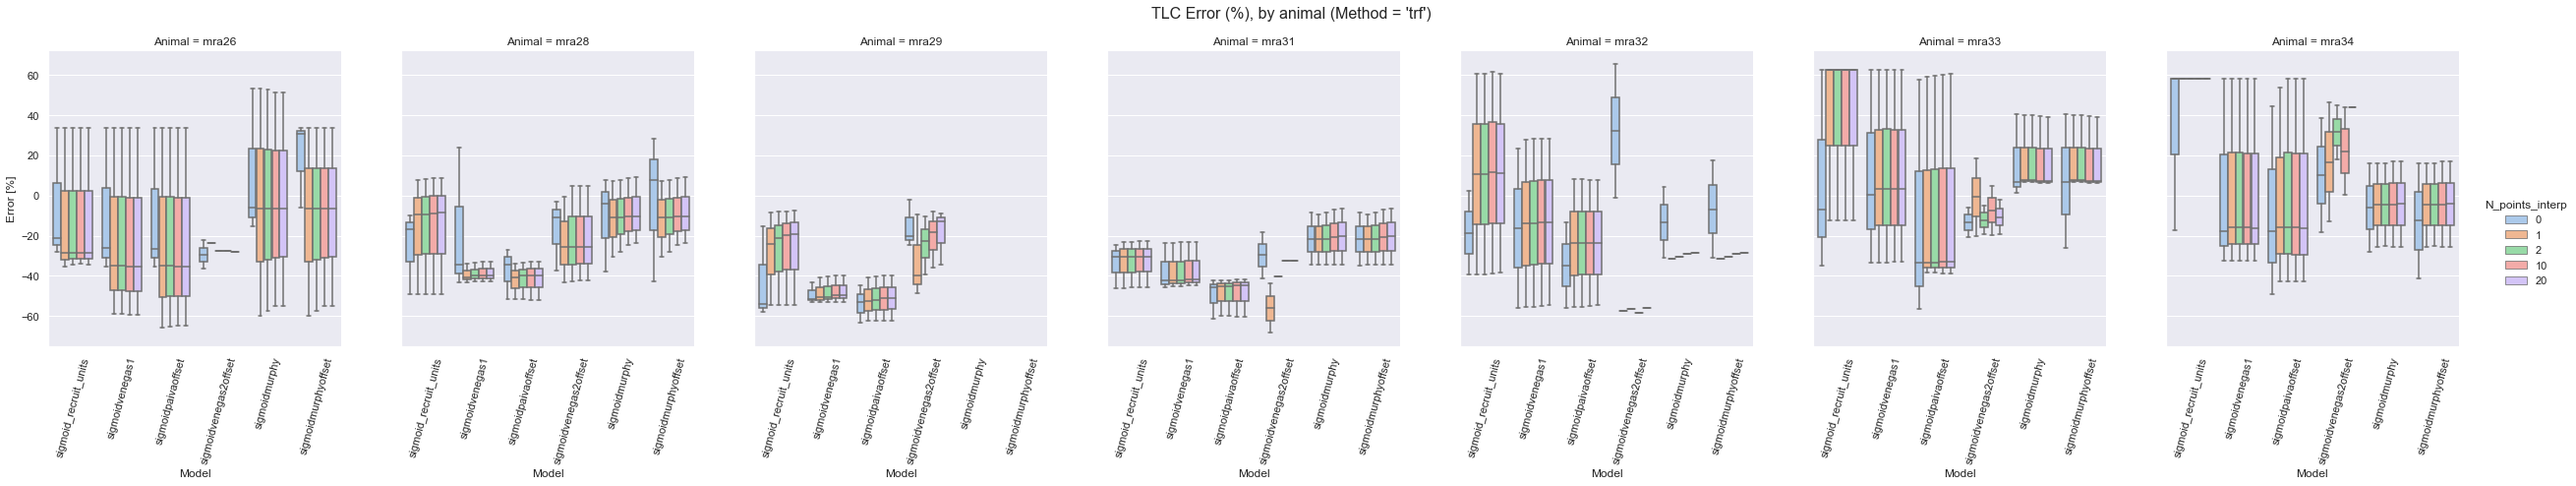

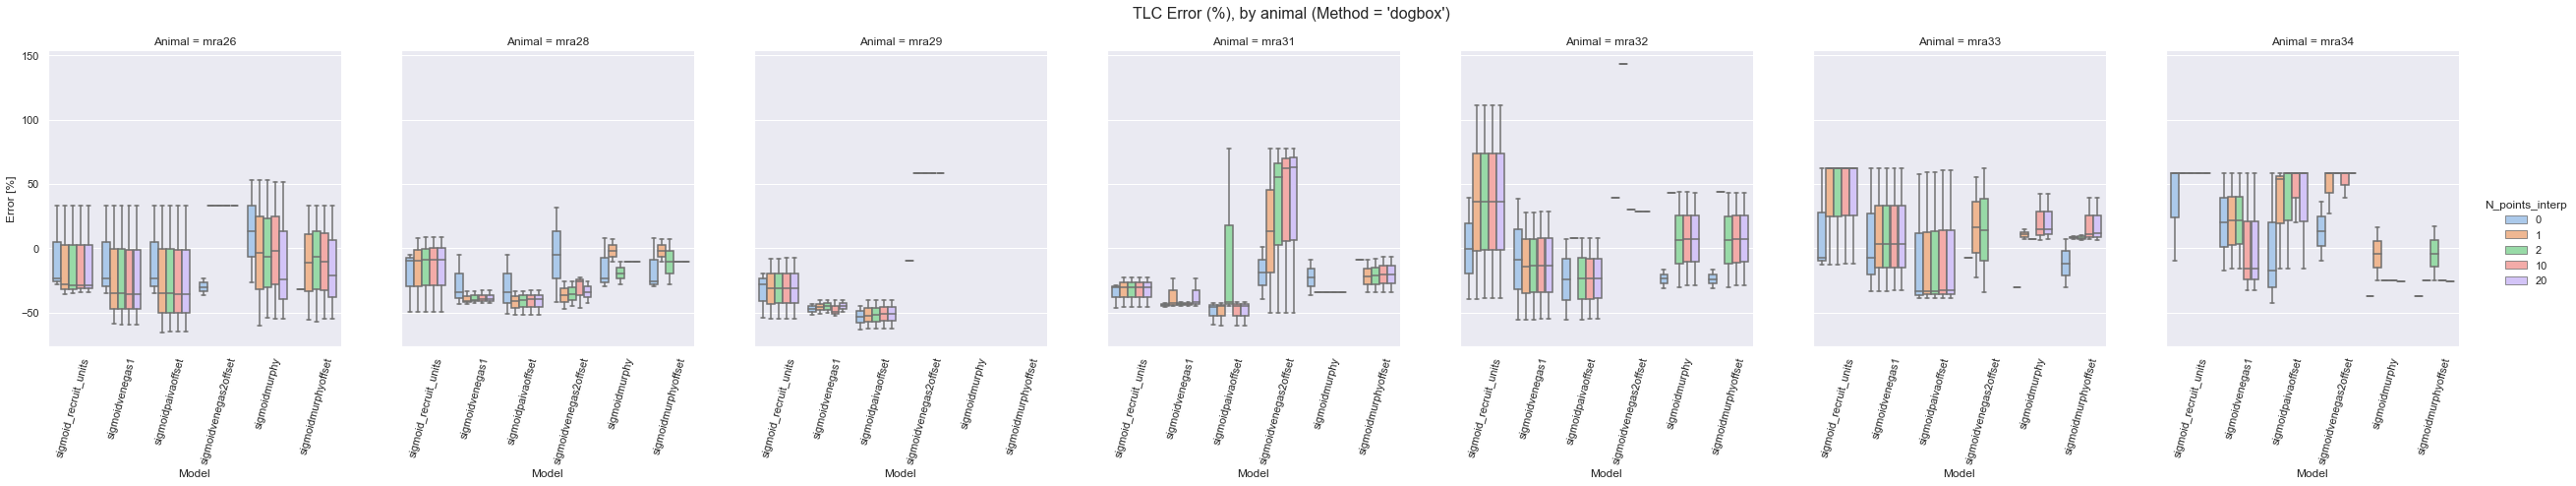

In [56]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 100, col='Animal', hue='N_points_interp', palette="pastel",
                      col_order = ('mra26','mra28','mra29','mra31','mra32','mra33','mra34'),
                      data=df)
    ax2.set_xticklabels(rotation=75)
    ax2.set_ylabels('Error [%]')#, fontsize=15) # 
    plt.suptitle('TLC Error (%), by animal (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

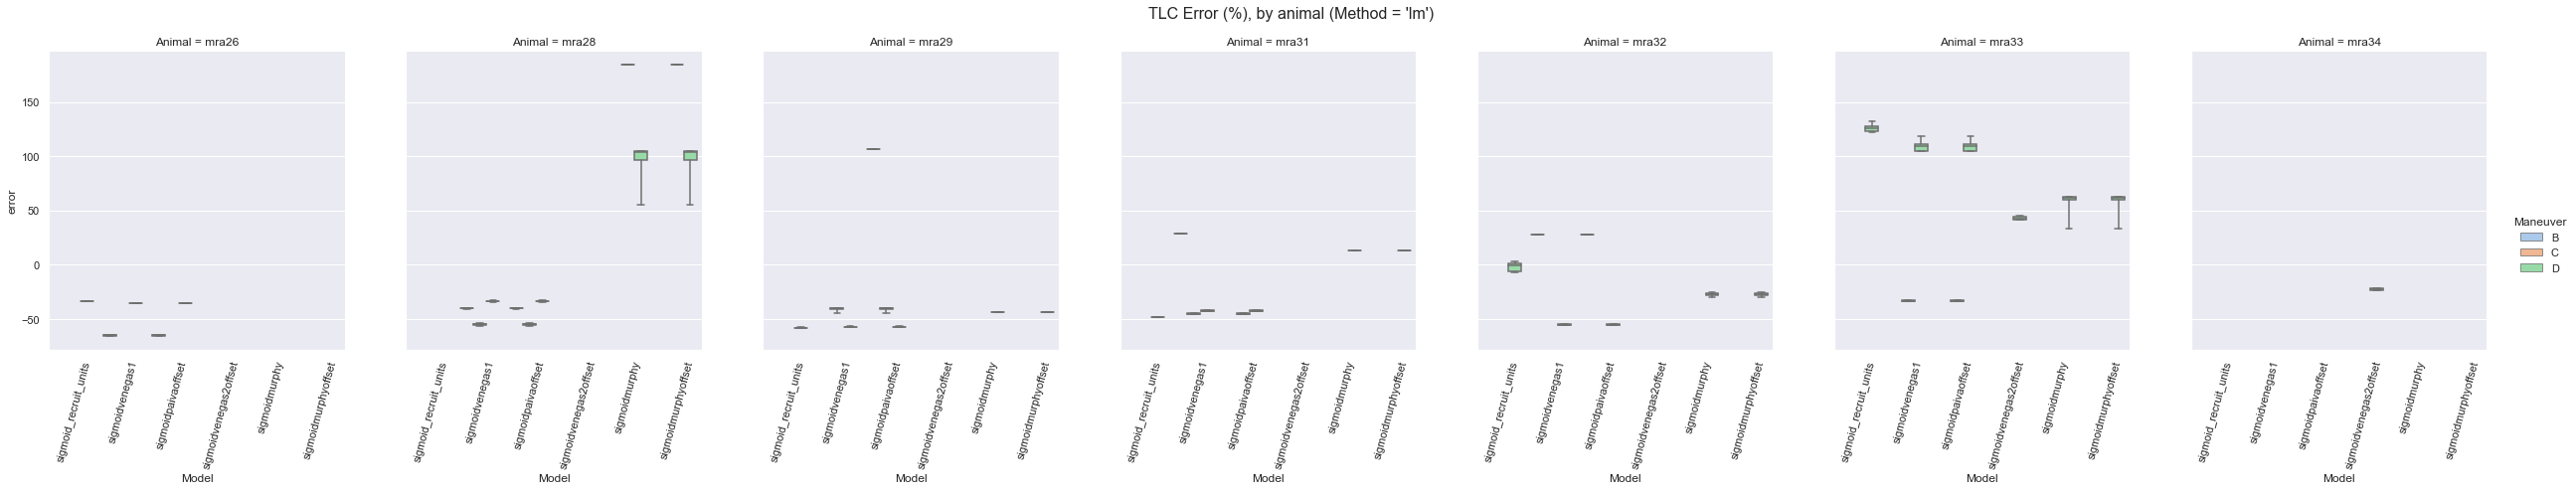

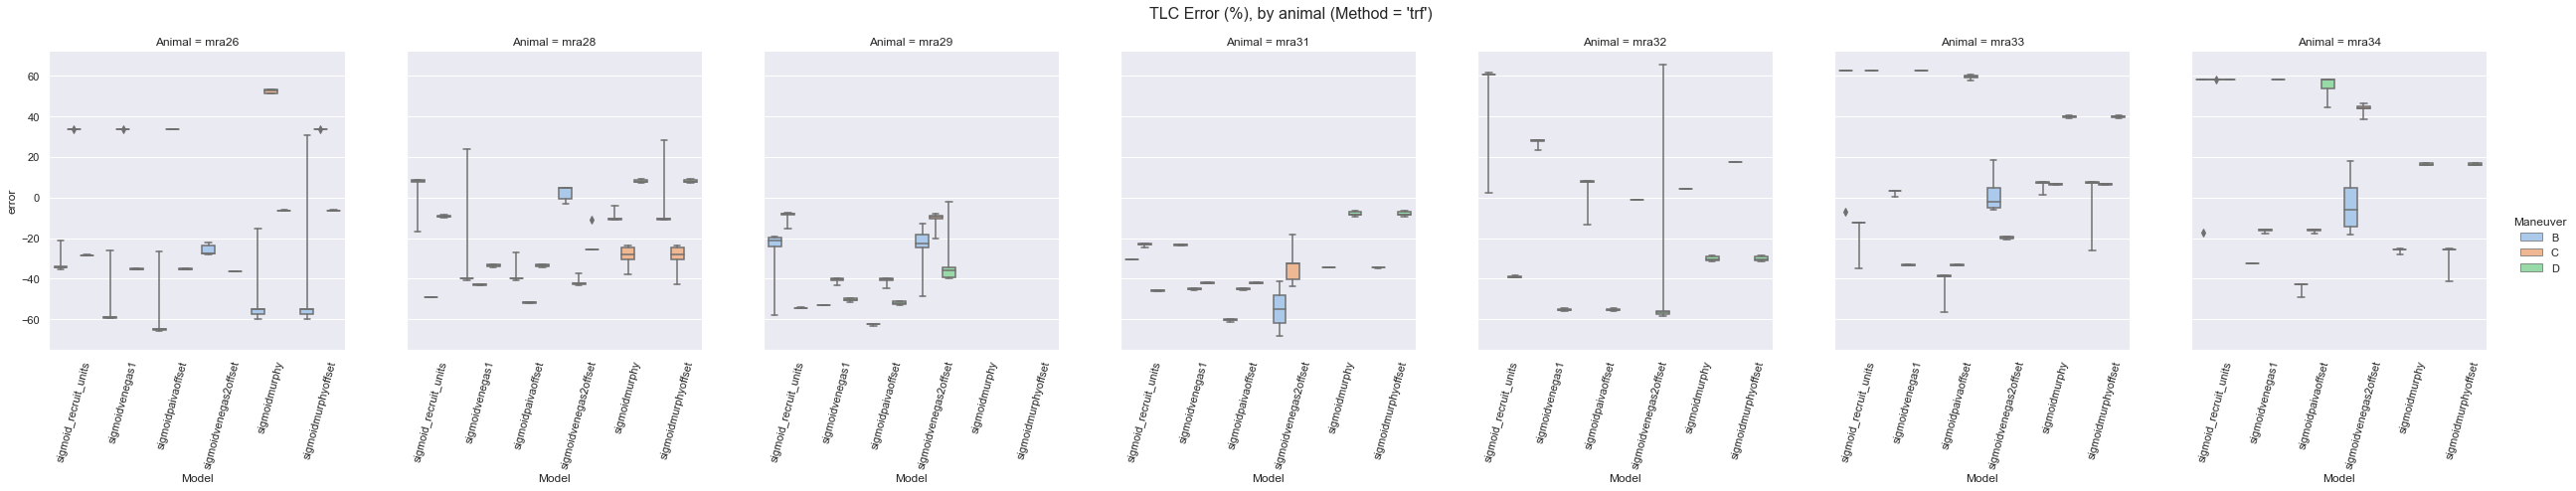

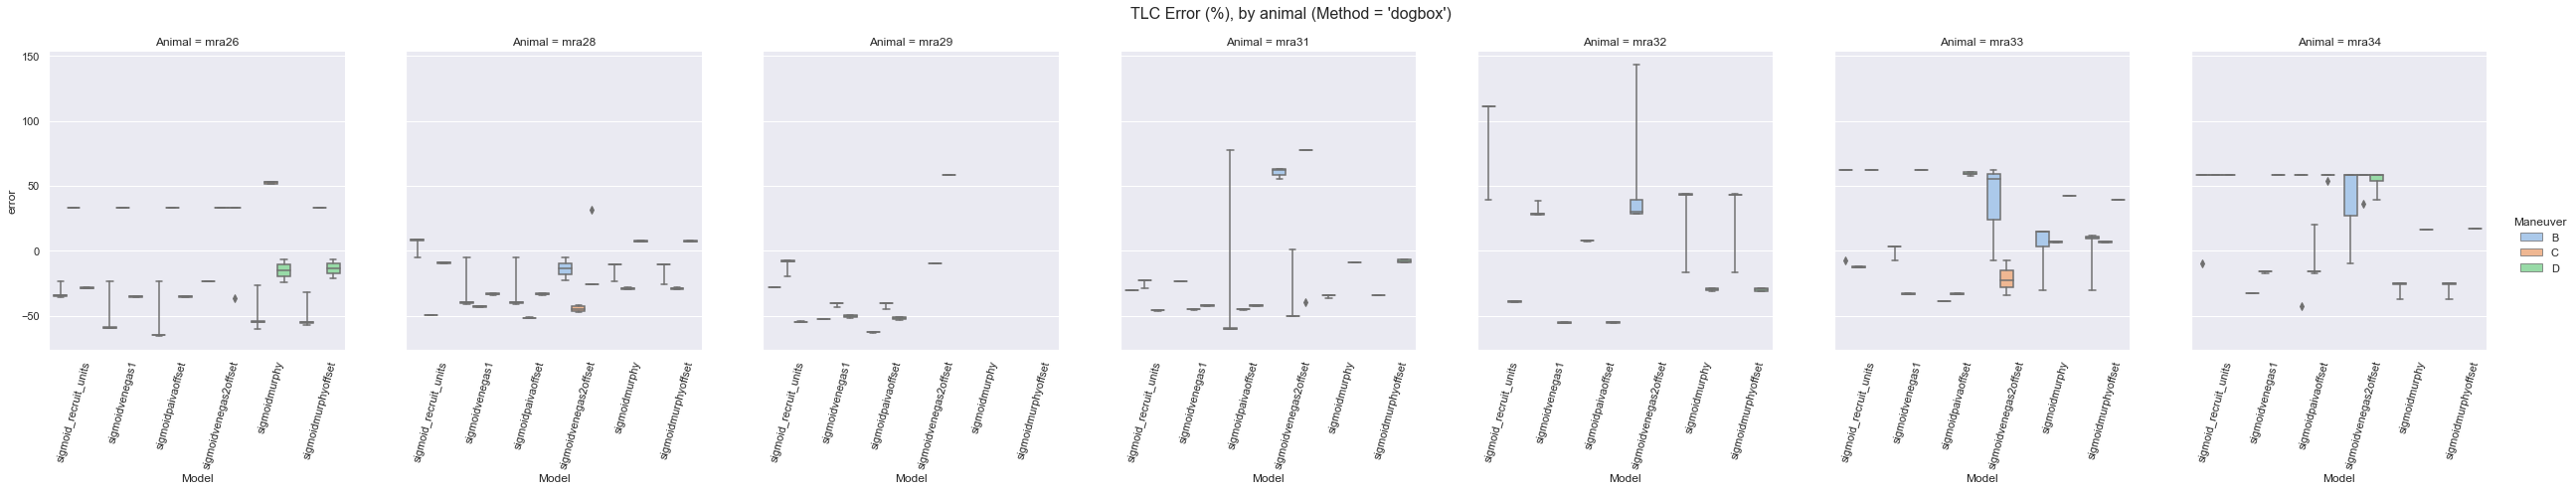

In [44]:
for met,df in zip(('lm','trf','dogbox'),(resultdf_indiv_fitted_lm,resultdf_indiv_fitted_trf,resultdf_indiv_fitted_dogbox)):
    ax2 = sns.catplot(x="Model", y="error", kind="box", 
                      whis = 1000, col='Animal', hue='Maneuver', palette="pastel",
                      col_order = ('mra26','mra28','mra29','mra31','mra32','mra33','mra34'),
                      hue_order = ('B','C','D'),
                      data=df)
    ax2.set_xticklabels(rotation=75)
    plt.suptitle('TLC Error (%), by animal (Method = \''+met+'\')', fontsize=16, y=1.05)
    plt.show()

# Exemplos de curvas

In [45]:
resultdf_indiv_fitted_trf.head(1)

Animal Maneuver n_steps                                          Pressures  \
20  mra34        C       4  [9.928905963897705, 14.968489646911621, 20.058...   

                                              Volumes                  Model  \
20  [-259.58831787109375, -81.21270751953125, 147....  sigmoid_recruit_units   

   Method TLC_index N_points_interp                          p0  \
20    trf         1               0  [0.05, 2000, 27, 12, -200]   

                                               bounds fitted  \
20  ([0.03, 500, 10, 6, -500], [0.07, 3500, 40, 35...   True   

                                           parameters  Vol_CT      error  \
20  [0.0699999990525451, 3499.9999986602725, 35.78...  2211.2  58.285094   

   fit error error factor                                           Raw data  
20  3.982365     1.991182  [[9.928905963897705, -259.58831787109375], [20...